# Porównanie wyników symulacji światła

## Format plików json z wynikami

pliki zapisywano z sufiksem *_cube.json*

```
data = {
            "n_photons": Nphotons,
            "overflow": cube_overflow,
            "bins_per_1_cm": bins_per_1_cm,
            "mu_a": mu_a, - is lacking in data cube
            "name": name, - is lacking in data cube
            "photon_weight": photon_weight, - is lacking in data cube
            "cube": Cube
        }
```

## Wczytywanie plików json

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rc
from scipy.stats import chisquare, kstest, norm, levene, ttest_ind
from matplotlib.colors import LogNorm, Normalize
from PIL import Image
import os

In [3]:
np.random.seed(seed=1)

benchmark = filename_my_100mln_cube\
Benchmark to wyniki symulacji z literatury z identycznymi nastawami, jak we własnej implementacji.\
Pozostałe wyniki będą porównywane do benchmarku, aby określić jak dokładnie odwzorowują zjawisko naświetlania fotonami.

pary do porównania:
1. filename_mati_1mln_cube - filename_my_100mln_cube
1. random_cube - filename_my_100mln_cube **próba kontrolna**
2. filename_my_1mln_cube - filename_my_100mln_cube
2. filename_my_10mln_cube - filename_my_100mln_cube
3. filename_org_1mld_cube - filename_my_100mln_cube

In [4]:
os.listdir('CUBES')

['mati-sim 2-layers',
 'mati-sim 3-layers',
 'mati-sim my_params 10k g {0, 0.5, 0.9, 1}',
 'mati-sim my_params 10k-100mln',
 'mati-sim org_params 10k-10mln',
 'mati-sim veins',
 'mc456 my-params light-sources',
 'mc456 my_params 10k-100mln',
 'mc456 org_params 10k-100mln',
 'mc456 rozne g (0.0-1.0 z krokiem 0.1) 100mln',
 'mc456 rozne_skóry_z_tabeli (8 rodzajów) 100mln',
 'mc456_p my-params 10k-10mln']

In [5]:
dir_my_100mln_cube = "CUBES/mc456 my_params 10k-100mln"
dir_my_1mln_cube = "CUBES/mc456 my_params 10k-100mln"
dir_mati_my_100mln_cube = "CUBES/mati-sim my_params 10k-100mln"
dir_mati_my_1mln_cube = "CUBES/mati-sim my_params 10k-100mlnn"

dir_p_my_10mln_cube = "CUBES/mc456_p my-params 10k-10mln"
dir_my_10mln_cube = "CUBES/mc456 my_params 10k-100mln/mc456_mc_10mln_my_params_cube.json"

dir_org_100mln_cube = "CUBES/mc456 org_params 10k-100mln"
dir_org_1mln_cube = "CUBES/mc456 org_params 10k-100mln"
dir_mati_org_10mln_cube = "CUBES/mati-sim org_params 10k-10mln"
dir_mati_org_1mln_cube = "CUBES/mati-sim org_params 10k-10mln"

all_dir_list = [dir_my_100mln_cube, dir_my_1mln_cube, dir_mati_my_100mln_cube, dir_mati_my_1mln_cube,
                dir_p_my_10mln_cube, dir_my_10mln_cube,
                dir_org_100mln_cube, dir_org_1mln_cube, dir_mati_org_10mln_cube, dir_mati_org_1mln_cube]
dir_list = [dir_my_100mln_cube, dir_mati_my_100mln_cube, dir_org_100mln_cube, dir_mati_org_10mln_cube, dir_p_my_10mln_cube]

In [6]:
a = dir_list[4]
print(a)
b = os.listdir(a)
sorted(b)

CUBES/mc456_p my-params 10k-10mln


['mc456_p_100k_my_params_tiss_id_4_g_0_9_ls_down_cube.json',
 'mc456_p_10k_my_params_tiss_id_4_g_0_9_ls_down_cube.json',
 'mc456_p_10mln_my_params_tiss_id_4_g_0_9_ls_down_cube.json',
 'mc456_p_1mln_my_params_tiss_id_4_g_0_9_ls_down_cube.json']

In [7]:
filename_my_100mln_cube = "CUBES/mc456 my_params 10k-100mln/mc456_mc_100mln_my_params_cube.json"
filename_my_1mln_cube = "CUBES/mc456 my_params 10k-100mln/mc456_mc_1mln_my_params_cube.json"
filename_mati_my_100mln_cube = "CUBES/mati-sim my_params 10k-100mln/mati-sim 100mln_my_params_cube.json"
filename_mati_my_1mln_cube = "CUBES/mati-sim my_params 10k-100mln/mati-sim 1mln_my_params_cube.json"

filename_p_my_10mln_cube = "CUBES/mc456_p my-params 10k-10mln/mc456_p_10mln_my_params_tiss_id_4_g_0_9_ls_down_cube.json"
filename_my_10mln_cube = "CUBES/mc456 my_params 10k-100mln/mc456_mc_10mln_my_params_cube.json"

filename_org_100mln_cube = "CUBES/mc456 org_params 10k-100mln/mc456_mc_100mln_original_params_cube.json"
filename_org_1mln_cube = "CUBES/mc456 org_params 10k-100mln/mc456_mc_1mln_original_params_cube.json"
filename_mati_org_10mln_cube = "CUBES/mati-sim org_params 10k-10mln/mati-sim 10mln_original_params_cube.json"
filename_mati_org_1mln_cube = "CUBES/mati-sim org_params 10k-10mln/mati-sim 1mln_original_params_cube.json"

all_filename_list = [filename_my_100mln_cube, filename_my_1mln_cube, filename_mati_my_100mln_cube, filename_mati_my_1mln_cube,
                     filename_p_my_10mln_cube, filename_my_10mln_cube,
                     filename_org_100mln_cube, filename_org_1mln_cube, filename_mati_org_10mln_cube, filename_mati_org_1mln_cube]

In [8]:
def load_from_file(filename):
    file = open(filename, 'r')
    data = json.load(file)
    file.close()
    return data

def cube_list2array(d):
    d['cube'] = np.asarray(d['cube'])

def trim_cube(d, sh):
    if d['cube'].shape != sh:
        print("trimming")
        print("shape", d['cube'].shape)
        d['cube'] = d['cube'][:sh[0], :sh[1], :sh[2]]
        print("shape", d['cube'].shape)

def load_from_filename_list(fn_list):
    cube_list = []
    for fn in fn_list:
        cube = load_from_file(fn)
        cube_list2array(cube)
        trim_cube(cube, (180, 180, 240))
        cube_list.append(cube)
    return cube_list

all_cubes = load_from_filename_list(all_filename_list)

trimming
shape (181, 181, 241)
shape (180, 180, 240)


In [9]:
print(len(all_cubes))

10


In [10]:
all_mu_a = [1.673, 1.673, 1.673, 1.673,
            1.673, 1.673,
            0.37, 0.37, 0.37, 0.37]

all_cubes_names = ['mc456_my_100mln_cube', 'mc456_my_1mln_cube', 'mati_my_100mln_cub', 'mati_my_1mln_cube',
                   'p_my_10mln_cube', 'mc456_my_10mln_cube',
                   'org_100mln_cube', 'org_1mln_cube', 'mati_org_10mln_cube', 'mati_org_1mln_cube']

for cub, name, mu_a, fn, fndir in zip(all_cubes, all_cubes_names, all_mu_a, all_filename_list, all_dir_list):
    cub['name'] = name
    cub['photon_weight'] = 1.0
    cub['normalized_already'] = False
    cub['mu_a'] = mu_a
    cub['file_path'] = fn
    cub['file_dir_path'] = fndir


In [11]:
def cube_by_name(all_cubes, name):
    for i in range(len(all_cubes)):
        if all_cubes[i]['name'] == name:
            return all_cubes[i]
    return None

In [12]:
if all_cubes[0]['name'] == 'random_cube':
    all_cubes = all_cubes[1:]

In [13]:
# próba kontrolna
def add_random_cube(all_cubes):
    if all_cubes[0]['name'] == 'random_cube':
        print('ta seria ma już random_cube!')
    else:
        c = all_cubes[0]['cube'] # my params
        sh0 = len(c)
        sh1 = len(c[0])
        sh2 = len(c[0][0])
        cube_shape = [sh0, sh1, sh2]
        cb = cube_shape

        random_arr = np.random.rand(cb[0], cb[1], cb[2])
        s = random_arr.sum()
        n_random_photons = 10_000_000
        random_arr *= n_random_photons
        random_arr /= s

        c2 = all_cubes[0]
        random_cube = {
            "n_photons": n_random_photons,
            "overflow": 0,
            "mu_a": 1.673,
            "name": 'random_cube',
            "bins_per_1_cm": c2['bins_per_1_cm'],
            "cube": random_arr,
            "photon_weight": 1.0,
            "normalized_already": False,
            "file_path": "NA",
            "file_dir_path": "NA"
        }

        print(random_arr.size)
        print(random_arr.shape)
        print(random_arr.sum())

        all_cubes.insert(0, random_cube)


add_random_cube(all_cubes)

7776000
(180, 180, 240)
10000000.00000001


## Eksperyment

<img src="../mati_sim/mati_propEnv.png" alt="comparing methods" width="300"/>

osie:<br>
*x=czerwony, y=zielony, z=niebieski*

<img src="../experiment_sketch.png" alt="comparing methods" width="600"/>

## Statystyki - cechy tablic wyjściowych

Większość funkcji ma dwa parametry - cube oraz arr\
Cube jest używany do przekazywania metadanych i ewantualnego przekazania surowej tablicy 3D z wynikami\
Jeśli arr zostanie określony, ma on pierwszeństwo przed tablicą z cube['cube']\
Zamysł jest taki, żeby funkcje mogły być używane zarówno na tablicach 3D, jak i 2D, 1D, czy kombinacjach |3D-3D|, przy jednoczesnym przekazywaniu metadanych.

In [36]:
print("shape", all_cubes[0]['cube'].shape)
print("size", all_cubes[0]['cube'].size)
print("len", len(all_cubes))

shape (180, 180, 240)
size 7776000
len 11


Normalizacja (inna niż poprawności wartości fluencji - do testów statystycznych)

In [37]:
def transnormal_hist_mid(arr, bins=1000):
    values = arr.copy().flatten()
    # to find bin_edges for very small and close to each other numbers
    values = values * 1000
    hist, bin_edges = np.histogram(values, bins=bins, density=False)
    cumsum = np.cumsum(hist)
    cumsum_bottom = np.hstack([np.array([0]), cumsum])[:-1]
    cum_sum_middle = cumsum_bottom + 0.5 * hist
    # number of all samples
    n = sum(hist)
    # proportion, probability
    p = cum_sum_middle / n # cdf dystrybuanta
    # Percent point function (inverse of cdf — percentiles)
    ppf = norm.ppf(p, loc=0, scale=1)
    pdf = norm.pdf(ppf, loc=0, scale=1)
    return pdf, ppf

def transnormal_hist(arr, bins=1000):
    values = arr.copy().flatten()
    # to find bin_edges for very small and close to each other numbers
    values = values * 1000
    hist, bin_edges = np.histogram(values, bins=bins, density=False)
    cumsum = np.cumsum(hist)
    # number of all samples
    n = sum(hist)
    # proportion, probability
    p = cumsum / n # cdf dystrybuanta
    # Percent point function (inverse of cdf — percentiles)
    ppf = norm.ppf(p, loc=0, scale=1)
    pdf = norm.pdf(ppf, loc=0, scale=1)
    return pdf, ppf

def transnormal_vals(arr, bins=1000):
    values = arr.copy().flatten()
    # to find bin_edges for very small and close to each other numbers
    values = values * 1000
    hist, bin_edges = np.histogram(values, bins=bins, density=False)
    cumsum = np.cumsum(hist)
    cumsum_bottom = np.hstack([np.array([0]), cumsum])[:-1]
    cum_sum_middle = cumsum_bottom + 0.5 * hist
    # number of all samples
    n = sum(hist)
    # proportion, probability
    p = cum_sum_middle / n # cdf dystrybuanta
    # Percent point function (inverse of cdf — percentiles)
    ppf = norm.ppf(p, loc=0, scale=1)
    # scale
    ppf = np.hstack([np.array([ppf[0]-(ppf[1]-ppf[0])/2]), ppf])
    out_arr = values.copy()
    for i in range(len(hist)):
        # <= value <=
        # can be closed both side, because it will be overwritten
        # must be closed, because lat val in bin_edges is included
        mask = (bin_edges[i] <= values) * (values <= bin_edges[i+1])
        # if bin_edges[i+1] - bin_edges[i] != 0 and ppf[i+1] - ppf[i] != 0:
        #     out_arr[mask] = (out_arr[mask] - bin_edges[i]) / (bin_edges[i+1] - bin_edges[i]) * (ppf[i+1] - ppf[i]) + ppf[i]
        # else:
        #     out_arr[mask] = ppf[i+1]
        out_arr[mask] = ppf[i+1]
    return out_arr


def print_stats(cub_list, cub_arr_list=None):
    print(f"{'Name' : >25}{'Sum' : >15}{'Avg' : >10}{'ks_normal_test' : >15}{'q0' : >15}{'q0_25' : >15}{'q0_50' : >15}{'q0_75' : >15}{'q1' : >15}{'std' : >15}{'variance' : >15}{'Overflow' : >15}{'perc. in' : >15}{'n_photons' : >15}{'non_zero_vals' : >15}{'zero_vals' : >15}")
    for i in range(len(cub_list)):
        cub = cub_list[i]
        if (cub_arr_list is None):
            cub_arr = cub['cube']
        else:
            cub_arr = cub_arr_list[i]
        n_phot = cub['n_photons']
        ovf = cub['overflow']
        s = cub_arr.sum()
        avg = np.average(cub_arr)
        q0 = np.quantile(cub_arr, q=0.0)
        q0_25 = np.quantile(cub_arr, q=0.25)
        q0_50 = np.quantile(cub_arr, q=0.50)
        q0_75 = np.quantile(cub_arr, q=0.75)
        q1 = np.quantile(cub_arr, q=1.0)
        std = np.std(cub_arr)
        var = np.var(cub_arr)
        perc = s / (s + ovf) * 100
        non_zero_vals = cub_arr.size - np.isclose(cub_arr, 0).sum()
        zero_vals = cub_arr.size - non_zero_vals
        hist, _ = np.histogram(cub_arr.flatten(), bins=256, density=True)
        ks_normal_test = kstest(hist, norm.cdf)
        ks_normal_test = ks_normal_test.pvalue
        print(f"{cub['name'] : >25}{s : >15,.2f}{avg : >10,.2f}{ks_normal_test : >15,.2f}{q0 : >15,.2f}{q0_25 : >15,.2f}{q0_50 : >15,.2f}{q0_75 : >15,.2f}{q1 : >15,.2f}{std : >15,.2f}{var : >15,.2f}{ovf : >15,.2f}{perc : >15,.2f}{n_phot : >15}{non_zero_vals : >15}{zero_vals : >15}")


def histogram(cub_list, cub_arr_list=None, p_min_list=None, p_max_list=None, title="histograms", transnormal=False):
    f,a = plt.subplots(4,3)
    f.set_figheight(9)
    f.set_figwidth(9)
    a = a.ravel()
    for i in range(len(cub_list)):
        if (cub_arr_list is None):
            cub_arr = cub_list[i]['cube']
        else:
            cub_arr = cub_arr_list[i]
        hist_bins = 1000
        density = True
        # histogram = np.histogram(cub_arr, bins=hist_bins, density=density)
        # print("histogram: ", histogram)

        ax = a[i]
        # min range
        if p_min_list is None:
            p_min = 0.0
        else:
            p_min = p_min_list[i]
        q_min = np.quantile(cub_arr, q=p_min)
        # max range
        if p_max_list is None:
            p_max = 0.25
        else:
            p_max = p_max_list[i]
        q_max = np.quantile(cub_arr, q=p_max)
        # range of histogram
        rng = (q_min, q_max)
        if transnormal:
            his, edges = transnormal_hist(cub_arr.flatten(), bins=hist_bins)
            
            # print(cub_arr)
            # cub_arr2 = transnormal_vals(cub_arr.flatten(), bins=hist_bins)
            # global all_cubes
            # all_cubes[i]['cube2'] = cub_arr2
            # his, edges = np.histogram(cub_arr2.flatten(), range=rng, bins=hist_bins, density=density)
            # edges = edges[1:]
        else:
            his, edges = np.histogram(cub_arr.flatten(), range=rng, bins=hist_bins, density=density)
            edges = edges[1:]
        # ax.hist(cub_arr.flatten(), range=rng, bins=hist_bins, density=density)
        # ax.plot(his, edges[1:])
        # print(his)
        ax.plot(edges, his)
        ax.set_title("Rozkład prawdopodobieństwa\n" + cub_list[i]['name'], linespacing=1.5)
        ax.set_xlabel("Współczynnik fluencji względnej\n" + r"Fl [$1/cm^2$]", linespacing=1.5)
        # [$\frac{1}{cm^2}$]
        ylabel = "P(Fl)"
        ax.set_ylabel(ylabel)

    plt.tight_layout()
    f.suptitle(title, fontsize="x-large", y=1.1)
    f.subplots_adjust(top=0.95)

In [38]:
print_stats(all_cubes)

                     Name            Sum       Avg ks_normal_test             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals      zero_vals
              random_cube   1,032,875.07      0.13           0.00           0.00           0.07           0.13           0.20           0.27           0.08           0.01           0.00         100.00       10000000        7776000              0
     mc456_my_100mln_cube     526,086.39      0.07           0.00           0.00           0.01           0.03           0.06       2,967.76           2.23           4.96     506,786.17          50.93      100000000        7776000              0
       mc456_my_1mln_cube     525,906.23      0.07           0.00           0.00           0.01           0.03           0.06       2,969.73           2.23           4.96     506,944.88          50.92        1000000        7517085         258915
       mati_my_1


chart 1
min histogram range in quantiles [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
max histogram range in quantiles [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

chart 2
min histogram range in quantiles [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
max histogram range in quantiles [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

chart 3
min histogram range in quantiles [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
max histogram range in quantiles [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]



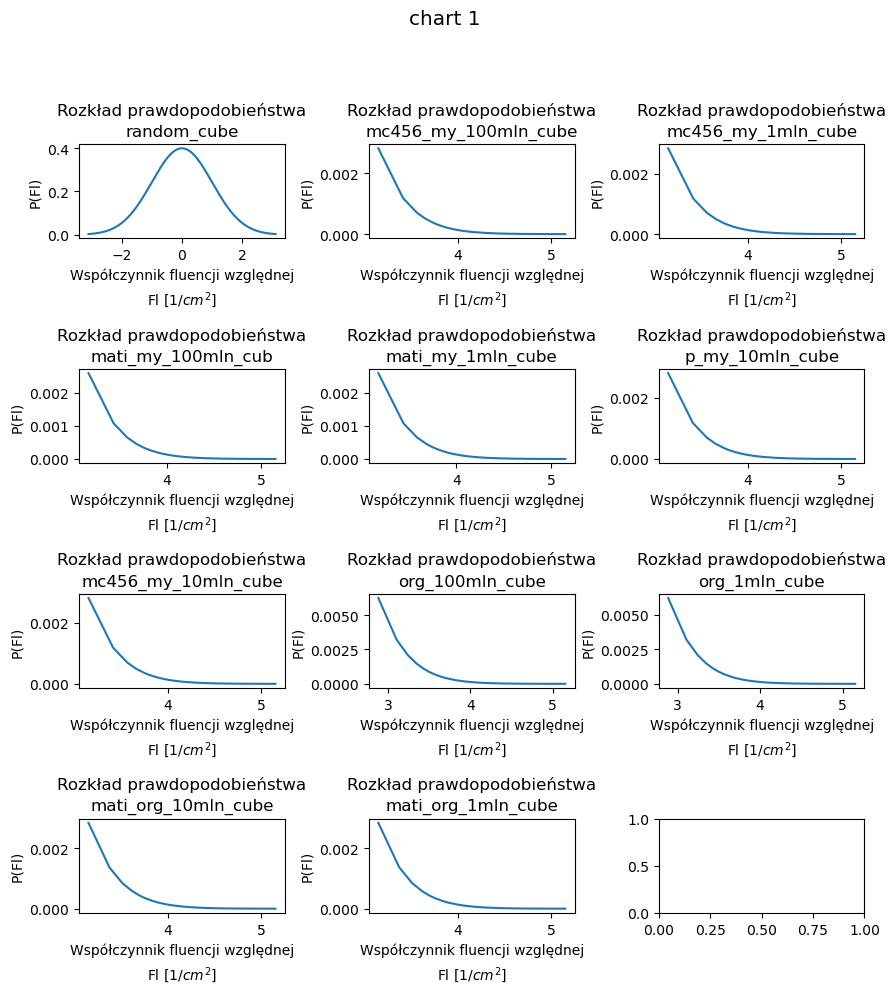

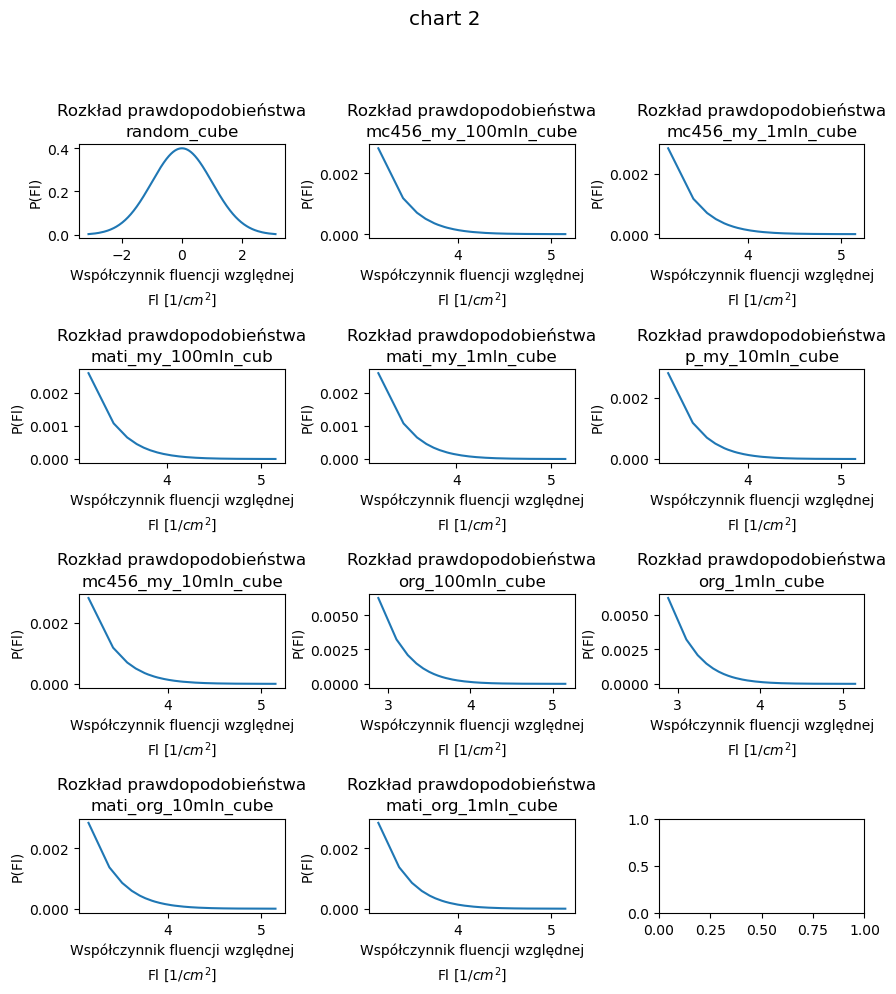

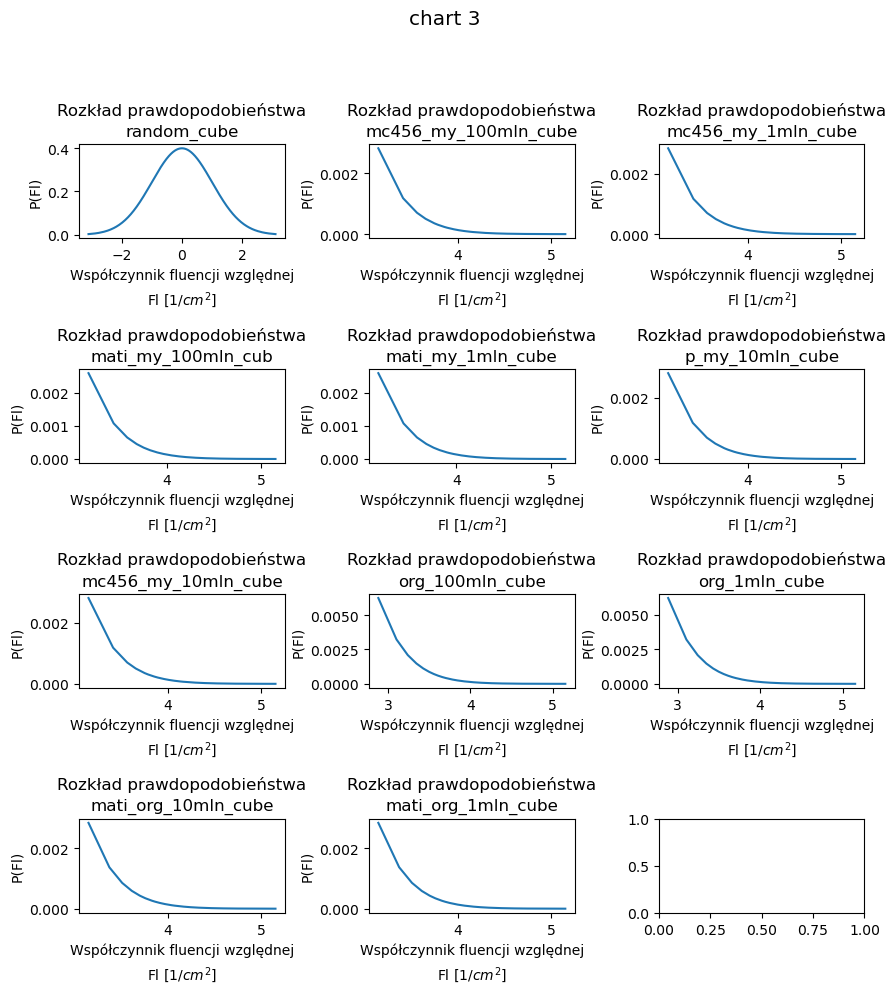

In [39]:
def print_histograms(all_cubes, cub_arr_list=None, transnormal=False):
    print()
    i = 1
    l = len(all_cubes)
    
    p_min_list = [0.0 for _ in range(l)]
    p_max_list = [1.0 for _ in range(l)]
    title = f'chart {i}'
    print(title)
    i += 1
    print('min histogram range in quantiles', p_min_list)
    print('max histogram range in quantiles', p_max_list)
    histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    print()
    
    p_min_list = [0.1 for _ in range(l)]
    p_max_list = [0.9 for _ in range(l)]
    title = f'chart {i}'
    print(title)
    i += 1
    print('min histogram range in quantiles', p_min_list)
    print('max histogram range in quantiles', p_max_list)
    histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    print()

    # p_min_list = [0.25 for _ in range(l)]
    # p_max_list = [1.0 for _ in range(l)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min histogram range in quantiles', p_min_list)
    # print('max histogram range in quantiles', p_max_list)
    # histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    # print()

    p_min_list = [0.0 for _ in range(l)]
    p_max_list = [0.25 for _ in range(l)]
    title = f'chart {i}'
    print(title)
    i += 1
    print('min histogram range in quantiles', p_min_list)
    print('max histogram range in quantiles', p_max_list)
    histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    print()

    # p_min_list = [0.0 for _ in range(l)]
    # p_max_list = [0.9, 0.01, 0.01, 0.01, 0.9, 0.001]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min histogram range in quantiles', p_min_list)
    # print('max histogram range in quantiles', p_max_list)
    # histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    # print()

    # p_min_list = [0.05 for _ in range(l)]
    # p_max_list = [1.0 for _ in range(l)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min histogram range in quantiles', p_min_list)
    # print('max histogram range in quantiles', p_max_list)
    # histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    # print()

    # p_min_list = [0.05 for _ in range(l)]
    # p_max_list = [0.25 for _ in range(l)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min histogram range in quantiles', p_min_list)
    # print('max histogram range in quantiles', p_max_list)
    # histogram(all_cubes, cub_arr_list=cub_arr_list, p_min_list=p_min_list, p_max_list=p_max_list, title=title, transnormal=transnormal)
    # print()



print_histograms(all_cubes, transnormal=True)

## Normalizacja

normalizacja w *mc321.c*<br>
Fsph = Csph[ir]/Nphotons/shellvolume/mua;
[1/cm2]

In [40]:
def normalization(d):
    if d['normalized_already']:
        print('dane znormalizowano już wcześniej!')
    else:
        # bins_per_1_cm = 120
        # mu_a = 0.37
        # n_photons = 1_000_000
        # val = val * 4.67
        bin_size_in_cm = 1 / d['bins_per_1_cm']
        bin_volume = (bin_size_in_cm)**3
        multi = 1 / (d['n_photons'] * bin_volume * d['mu_a'])
        d['cube'] = d['cube'] * multi
        d['overflow'] = d['overflow'] * multi
        d['photon_weight'] = d['photon_weight'] * multi
        d['normalized_already'] = True



for c in all_cubes:
    normalization(c)

print_stats(all_cubes)

dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
dane znormalizowano już wcześniej!
                     Name            Sum       Avg ks_normal_test             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals      zero_vals
              random_cube   1,032,875.07      0.13           0.00           0.00           0.07           0.13           0.20           0.27           0.08           0.01           0.00         100.00       10000000        7776000              0
     mc456_my_100mln_cube     526,086.39      0.07           0.00           0.00           0.01           0.03           0.


chart 1
min histogram range in quantiles [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
max histogram range in quantiles [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

chart 2
min histogram range in quantiles [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
max histogram range in quantiles [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

chart 3
min histogram range in quantiles [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
max histogram range in quantiles [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]



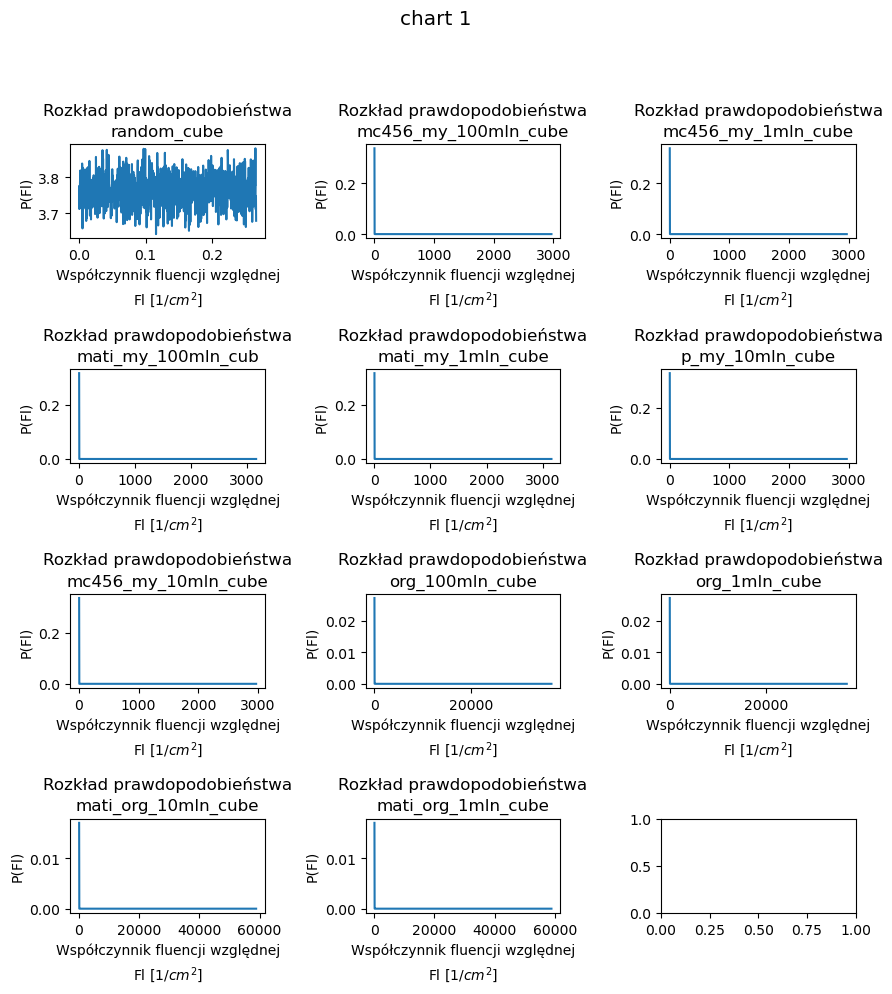

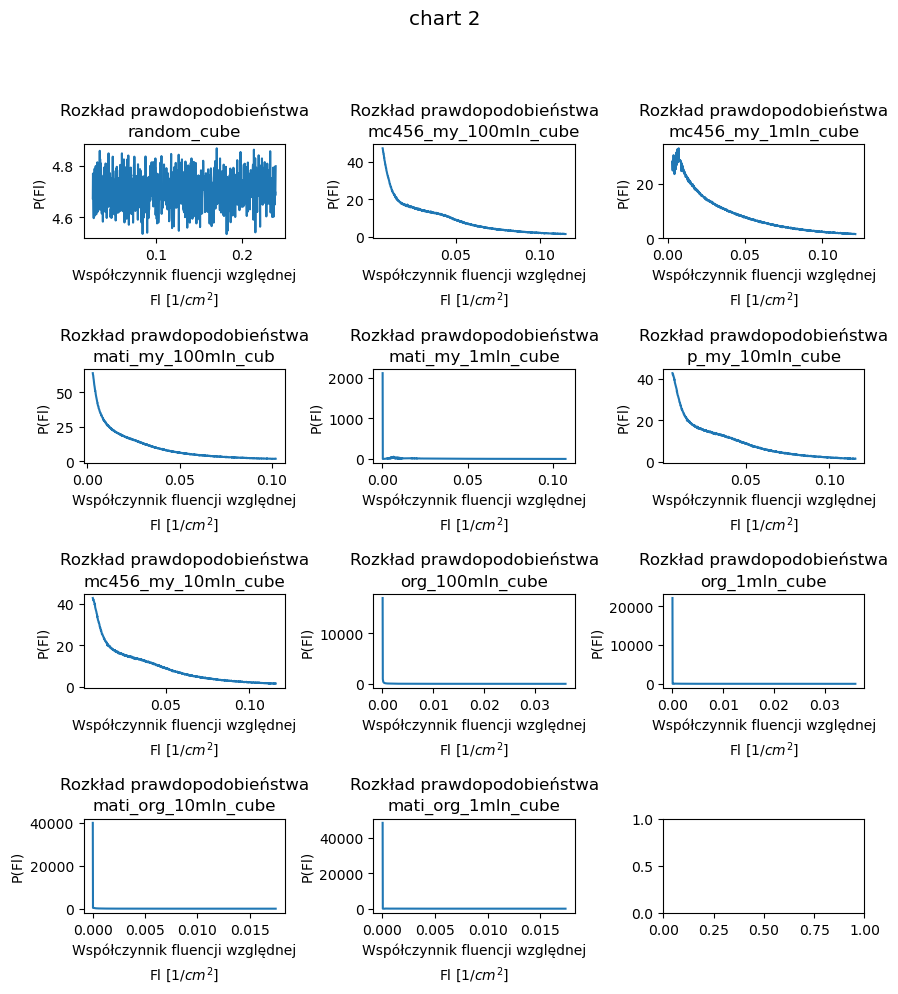

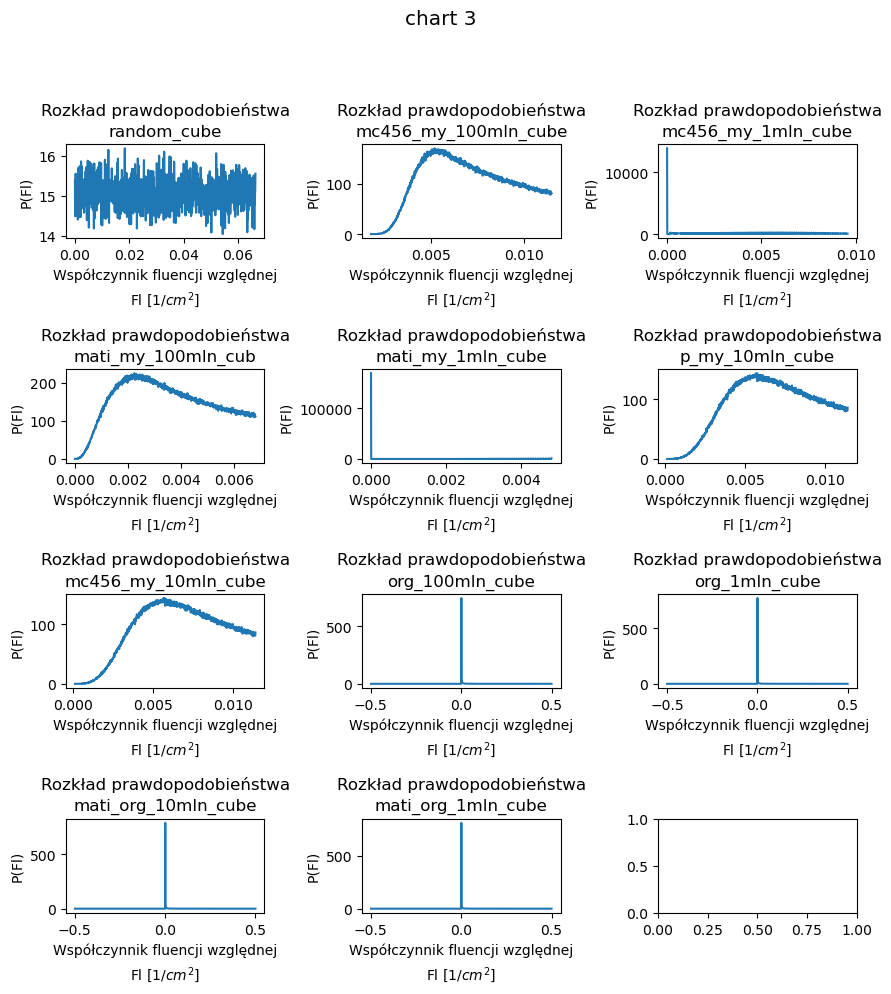

In [41]:
print_histograms(all_cubes)

## Metody porównawcze

<!-- <img src="mati_benchmark_methods2.png" alt="comparing methods" width="900"/> -->
<img src="../mati_benchmark_methods2.png" alt="comparing methods" width="900"/>
<!-- ![comparing methods](mati_benchmark_methods2.png) -->

Dane porównano 5 metodami:
1. cała tabliza 3D, 1:1
2. x_high 2D - obraz średniej wzdłuż 1 osi (osi x) oraz przekroje (slices)
3. z_high 2D - obraz średniej wzdłuż 1 osi (osi z) oraz przekroje (slices)
4. x_high 1D - obraz średniej wzdłuż 2 osi (osi y oraz osi z)
5. z_high 1D - obraz średniej wzdłuż 2 osi (osi y oraz osi z)

### Uniwersalne funkcje porównawcze - niezależne od rzędu wymiarów przestrzennych - 1D, 2D, 3D

In [46]:
def cohens_d(c0, c1):
    return (np.mean(c0) - np.mean(c1)) / (np.sqrt((np.std(c0) ** 2 + np.std(c1) ** 2) / 2))

def compare2cubes_universal(cub1, cub2, cub_arr1=None, cub_arr2=None):
    name = cub1['name']

    if cub_arr1 is None:
        arr1 = cub1['cube']
    else:
        arr1 = cub_arr1
    if cub_arr2 is None:
        arr2 = cub2['cube']
    else:
        arr2 = cub_arr2

    non_zero_vals1 = np.count_nonzero(arr1)
    non_zero_vals2 = np.count_nonzero(arr2)
    if non_zero_vals1 > 0 and non_zero_vals2 > 0:
        corr = np.corrcoef(arr1.flatten(), arr2.flatten())[0,1]
    else:
        corr = None

    # ------- flatten data histograms -------
    
    # p_min = 0.1
    # p_max = 0.9
    # q1_min = np.quantile(arr1, q=p_min)
    # q1_max = np.quantile(arr1, q=p_max)
    # q2_min = np.quantile(arr2, q=p_min)
    # q2_max = np.quantile(arr2, q=p_max)
    # range1 = (q1_min, q1_max) if q1_min != q1_max else None
    # range2 = (q2_min, q2_max) if q2_min != q2_max else None
    # range1 = None
    # range2 = None
    # min_all = np.min([np.min(arr1), np.min(arr2)])
    # max_all = np.max([np.max(arr1), np.max(arr2)])
    # range_common = (min_all, max_all)
    bins = 1000

    hist1_flat, _ = np.histogram(arr1.flatten(), bins=bins, density=False, range=None)
    hist2_flat, _ = np.histogram(arr2.flatten(), bins=bins, density=False, range=None)

    non_zero_vals1 = np.count_nonzero(hist1_flat)
    non_zero_vals2 = np.count_nonzero(hist2_flat)
    if non_zero_vals1 > 0 and non_zero_vals2 > 0:
        corr_hist_flat = np.corrcoef(hist1_flat, hist2_flat)[0,1]
    else:
        corr_hist_flat = None

    # dla testów statystycznych
    observed = transnormal_hist_mid(arr1.flatten(), bins=bins)
    expected = transnormal_hist_mid(arr2.flatten(), bins=bins)
    observed = observed / np.sum(observed)
    expected = expected / np.sum(expected)

    # corr on normalized data
    non_zero_vals1 = np.count_nonzero(observed)
    non_zero_vals2 = np.count_nonzero(expected)
    if non_zero_vals1 > 0 and non_zero_vals2 > 0:
        corr_norm_hist_flat = np.corrcoef(observed, expected)[0,1]
    else:
        corr_norm_hist_flat = None
    
    # ------- is normal? -------
    kstest_pval1 = kstest(observed, norm.cdf).pvalue
    kstest_pval2 = kstest(expected, norm.cdf).pvalue
    # ------- homogeniczne wariancje -------
    levene_pval1 = levene(observed, expected).pvalue
    levene_pval2 = levene(observed, expected).pvalue

    # ------- chi-square -------
    chi2_stat, chi2_pvalue = chisquare(observed, f_exp=expected)

    # ------- t test, d Cohena -------
    dcoh = cohens_d(observed, expected)
    ttest = ttest_ind(observed, expected)
    ttest_d = ttest.statistic
    ttest_pvalue = ttest.pvalue

    # ------- RMSE -------
    mse = np.square(np.subtract(arr1, arr2)).mean()
    rmse = np.sqrt(mse)


    # ------- print -------
    p1 = f"{name : >25}"
    p2 = f"{corr : >15,.2f}" if corr != None else f"{"-" : >15}"
    p3 = f"{corr_hist_flat : >15,.2f}" if corr_hist_flat != None else f"{"-" : >15}"
    p4 = f"{mse : >15,.2f}{rmse : >15,.2}{chi2_stat : >15,.2}{chi2_pvalue : >15,.2}"
    p5 = f"{corr_norm_hist_flat : >15,.2}" if corr_norm_hist_flat != None else f"{"-" : >15}"
    p5 = f"{kstest_pval1 : >15,.2}{kstest_pval2 : >15,.2}{levene_pval1 : >15,.2}{levene_pval2 : >15,.2}{dcoh : >15,.2}{ttest_d : >15,.2}{ttest_pvalue : >15,.2}"
    p_sum = p1+p2+p3+p4+p5
    print(p_sum)

def compare_all_cubes_universal(other_cub_list, benchmark_cub, other_arr_list=None, benchmark_arr=None):
    print(f"Comparison * to benchmark ({benchmark_cub['name']})")
    print(f"{'name' : >25}{'flat corr' : >15}{'flat hist corr' : >15}{'MSE' : >15}{'RMSE' : >15}{'chi2_stat' : >15}{'chi2 p_value' : >15}{'corr_norm_hist_flat' : >15}{'kstest_pval1' : >15}{'kstest_pval2' : >15}{'levene_pval1' : >15}{'levene_pval2' : >15}{'dcoh' : >15}{'ttest_d' : >15}{'ttest_pvalue' : >15}")

    for i in range(len(other_cub_list)):
        if other_arr_list is not None:
            other_arr = other_arr_list[i]
        else:
            other_arr = None
        compare2cubes_universal(other_cub_list[i], benchmark_cub, cub_arr1=other_arr, cub_arr2=benchmark_arr)





def corr_table_universal(all_cubes, all_arr=None):
    if all_arr is None:
        flat_arrs = [c['cube'].flatten() for c in all_cubes]
    else:
        flat_arrs = [a.flatten() for a in all_arr]
    print('\ncorrtable of flatten cubes')
    corrtable = np.corrcoef(flat_arrs)
    print(corrtable)

    bins = 1000
    hists = [np.histogram(fa.flatten(), bins=bins, density=False)[0] for fa in flat_arrs]
    print('\ncorrtable of histograms')
    corrtable_hist = np.corrcoef(hists)
    print(corrtable_hist)

    print()
    names = [c['name'] for c in all_cubes]
    print(names)





def diff_all_cubes(all_cubes, benchmark_cube):
    diffs = [np.absolute(benchmark_cube['cube'] - c['cube']) for c in all_cubes]
    print_stats(all_cubes, cub_arr_list=diffs)
    print_histograms(all_cubes, cub_arr_list=diffs)

### 1. cała tablica 3D, 1:1

In [43]:
print(all_cubes[4]['cube'].shape)
print(all_cubes[5]['cube'].shape)

(180, 180, 240)
(180, 180, 240)


In [47]:
benchmark_cube_my_params = cube_by_name(all_cubes, 'mc456_my_100mln_cube')
benchmark_cube_org_params = cube_by_name(all_cubes, 'org_100mln_cube')
compare_all_cubes_universal(all_cubes, benchmark_cube_my_params)
compare_all_cubes_universal(all_cubes, benchmark_cube_org_params)

Comparison * to benchmark (mc456_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_valuecorr_norm_hist_flat   kstest_pval1   kstest_pval2   levene_pval1   levene_pval2           dcoh        ttest_d   ttest_pvalue


c:\Users\mateu\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3345: RuntimeWarning: divide by zero encountered in scalar divide
  W = numer / denom


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[-1.00709066e+00 -1.06440223e+00 -1.07286858e+00 -1.07866594e+00
 -1.08339380e+00 -1.08740120e+00 -1.09081383e+00 -1.09409130e+00
 -1.09707528e+00 -1.09984797e+00 -1.10212918e+00 -1.10449693e+00
 -1.10677767e+00 -1.10894973e+00 -1.11093302e+00 -1.11264383e+00
 -1.11449206e+00 -1.11649173e+00 -1.11852436e+00 -1.12066933e+00
 -1.12345440e+00 -1.12609044e+00 -1.12754433e+00 -1.12902112e+00
 -1.13050951e+00 -1.13186025e+00 -1.13316780e+00 -1.13458666e+00
 -1.13612854e+00 -1.13757894e+00 -1.13888682e+00 -1.14028923e+00
 -1.14169855e+00 -1.14295375e+00 -1.14424934e+00 -1.14570134e+00
 -1.14709457e+00 -1.14830826e+00 -1.14951439e+00 -1.15073173e+00
 -1.15199554e+00 -1.15343383e+00 -1.15482010e+00 -1.15602157e+00
 -1.15724385e+00 -1.15846874e+00 -1.15975281e+00 -1.16121730e+00
 -1.16262114e+00 -1.16383098e+00 -1.16504120e+00 -1.16626413e+00
 -1.16748260e+00 -1.16890479e+00 -1.17033527e+00 -1.17155325e+00
 -1.17285161e+00 -1.17415450e+00 -1.17539656e+00 -1.17664270e+00
 -1.17803305e+00 -1.17949464e+00 -1.18080257e+00 -1.18203943e+00
 -1.18328364e+00 -1.18453412e+00 -1.18587043e+00 -1.18719779e+00
 -1.18853375e+00 -1.19016833e+00 -1.19192866e+00 -1.19341505e+00
 -1.19469815e+00 -1.19597532e+00 -1.19725425e+00 -1.19854767e+00
 -1.19985190e+00 -1.20148058e+00 -1.20313334e+00 -1.20457907e+00
 -1.20603323e+00 -1.20737518e+00 -1.20872486e+00 -1.21008366e+00
 -1.21143902e+00 -1.21278781e+00 -1.21451507e+00 -1.21627629e+00
 -1.21766523e+00 -1.21905859e+00 -1.22044276e+00 -1.22183747e+00
 -1.22324128e+00 -1.22479181e+00 -1.22635901e+00 -1.22780906e+00
 -1.22971849e+00 -1.23211056e+00 -1.23407182e+00 -1.23554949e+00
 -1.23704026e+00 -1.23854979e+00 -1.24006965e+00 -1.24158073e+00
 -1.24308188e+00 -1.24515128e+00 -1.24726762e+00 -1.24882556e+00
 -1.25041751e+00 -1.25200450e+00 -1.25358104e+00 -1.25537420e+00
 -1.25718630e+00 -1.25947681e+00 -1.26255253e+00 -1.26497546e+00
 -1.26664084e+00 -1.26833858e+00 -1.27006084e+00 -1.27264577e+00
 -1.27531304e+00 -1.27707028e+00 -1.27982187e+00 -1.28387859e+00
 -1.28701270e+00 -1.28885882e+00 -1.29069975e+00 -1.29254309e+00
 -1.29441599e+00 -1.29629782e+00 -1.29821287e+00 -1.30063521e+00
 -1.30310087e+00 -1.30509341e+00 -1.30707523e+00 -1.30908658e+00
 -1.31111252e+00 -1.31314049e+00 -1.31519300e+00 -1.31723156e+00
 -1.31928116e+00 -1.32137033e+00 -1.32346910e+00 -1.32558723e+00
 -1.32770974e+00 -1.32985590e+00 -1.33202867e+00 -1.33422529e+00
 -1.33645049e+00 -1.33868562e+00 -1.34095898e+00 -1.34325992e+00
 -1.34556287e+00 -1.34785809e+00 -1.35019161e+00 -1.35316703e+00
 -1.35621704e+00 -1.35865668e+00 -1.36107015e+00 -1.36350909e+00
 -1.36597829e+00 -1.36845990e+00 -1.37096196e+00 -1.37350885e+00
 -1.37609558e+00 -1.37871510e+00 -1.38138962e+00 -1.38407156e+00
 -1.38676981e+00 -1.38952212e+00 -1.39227655e+00 -1.39502795e+00
 -1.39780958e+00 -1.40063514e+00 -1.40348918e+00 -1.40637050e+00
 -1.40928311e+00 -1.41221540e+00 -1.41516216e+00 -1.41812066e+00
 -1.42111932e+00 -1.42416173e+00 -1.42802471e+00 -1.43195846e+00
 -1.43510975e+00 -1.43833365e+00 -1.44160383e+00 -1.44493046e+00
 -1.44827673e+00 -1.45165405e+00 -1.45508206e+00 -1.45854091e+00
 -1.46203126e+00 -1.46554370e+00 -1.46910772e+00 -1.47273640e+00
 -1.47642261e+00 -1.48014848e+00 -1.48391081e+00 -1.48771999e+00
 -1.49154979e+00 -1.49542989e+00 -1.49939506e+00 -1.50341376e+00
 -1.50746120e+00 -1.51154150e+00 -1.51566600e+00 -1.51986758e+00
 -1.52415325e+00 -1.52849621e+00 -1.53289909e+00 -1.53735686e+00
 -1.54181607e+00 -1.54632021e+00 -1.55093909e+00 -1.55674237e+00
 -1.56271328e+00 -1.56758598e+00 -1.57254067e+00 -1.57756458e+00
 -1.58264382e+00 -1.58777561e+00 -1.59292826e+00 -1.59822436e+00
 -1.60366071e+00 -1.60911698e+00 -1.61463703e+00 -1.62033331e+00
 -1.62613341e+00 -1.63197256e+00 -1.63786309e+00 -1.64383125e+00
 -1.64995580e+00 -1.65617803e+00 -1.66243967e+00 -1.66885649e+00
 -1.67545141e+00 -1.68214222e+00 -1.68883959e+00 -1.69555427e+00
 -1.70245450e+00 -1.70957265e+00 -1.71683600e+00 -1.72421055e+00
 -1.73171530e+00 -1.73927356e+00 -1.74692318e+00 -1.75482418e+00
 -1.76278501e+00 -1.77093048e+00 -1.77933063e+00 -1.78778278e+00
 -1.79648728e+00 -1.80716430e+00 -1.81810927e+00 -1.82744789e+00
 -1.83695378e+00 -1.84655234e+00 -1.85620326e+00 -1.86611791e+00
 -1.87630996e+00 -1.88667954e+00 -1.89740059e+00 -1.90828254e+00
 -1.91932981e+00 -1.93069170e+00 -1.94245302e+00 -1.95444707e+00
 -1.96647671e+00 -1.97894179e+00 -1.99172996e+00 -2.00454772e+00
 -2.01779015e+00 -2.03148869e+00 -2.04548201e+00 -2.05977398e+00
 -2.07429257e+00 -2.08922429e+00 -2.10465753e+00 -2.12068411e+00
 -2.13719726e+00 -2.15416244e+00 -2.17156147e+00 -2.18937300e+00
 -2.20768999e+00 -2.22623572e+00 -2.24517604e+00 -2.26499788e+00
 -2.28554864e+00 -2.30673719e+00 -2.32854837e+00 -2.35096460e+00
 -2.37419113e+00 -2.39819567e+00 -2.42309242e+00 -2.44874785e+00
 -2.47507412e+00 -2.50586266e+00 -2.53834494e+00 -2.56785220e+00
 -2.59808485e+00 -2.62964292e+00 -2.66263095e+00 -2.69693976e+00
 -2.73245448e+00 -2.76963469e+00 -2.80861617e+00 -2.84919263e+00
 -2.89104499e+00 -2.93429481e+00 -2.97995999e+00 -3.02802032e+00
 -3.07774901e+00 -3.12960374e+00 -3.18411790e+00 -3.24206279e+00
 -3.30304016e+00 -3.36611615e+00 -3.43231102e+00 -3.50291783e+00
 -3.57813594e+00 -3.65823560e+00 -3.74282557e+00 -3.83269285e+00
 -3.92943635e+00 -4.03254516e+00 -4.14262429e+00 -4.26040428e+00
 -4.38571050e+00 -4.52055697e+00 -4.66922407e+00 -4.83364282e+00
 -5.01031933e+00 -5.20211279e+00 -5.41318438e+00 -5.64381754e+00
 -5.90076984e+00 -6.18763201e+00 -6.50900087e+00 -6.87312822e+00
 -7.28832230e+00 -7.76034939e+00 -8.31247000e+00 -8.96452275e+00
 -9.74109552e+00 -1.06900400e+01 -1.18497133e+01 -1.33236593e+01
 -1.52757934e+01 -1.80269082e+01 -2.20395498e+01 -2.84035259e+01
 -4.03480343e+01 -6.99447853e+01 -2.82266877e+02  1.32797421e+02
  5.32988375e+01  3.29924505e+01  2.37888909e+01  1.85591456e+01
  1.51274770e+01  1.27201359e+01  1.09525818e+01  9.58891473e+00
  8.48858224e+00  7.60496072e+00  6.88183329e+00  6.26973548e+00
  5.74779766e+00  5.29350642e+00  4.89617613e+00  4.54518228e+00
  4.23341356e+00  3.95350894e+00  3.70516006e+00  3.48523763e+00
  3.28463171e+00  3.10017962e+00  2.92991432e+00  2.77496788e+00
  2.63264550e+00  2.50162485e+00  2.37989721e+00  2.26456664e+00
  2.15707366e+00  2.05681971e+00  1.96352460e+00  1.87681874e+00
  1.79466727e+00  1.71702798e+00  1.64356704e+00  1.57350525e+00
  1.50723643e+00  1.44474006e+00  1.38505438e+00  1.32734513e+00
  1.27265271e+00  1.22095414e+00  1.17173394e+00  1.12442344e+00
  1.07885417e+00  1.03595169e+00  9.95118806e-01  9.55876726e-01
  9.18489490e-01  8.82327331e-01  8.47643865e-01  8.14346180e-01
  7.87504179e-01  7.62110586e-01  7.31796709e-01  7.02234309e-01
  6.73578863e-01  6.46172018e-01  6.19854165e-01  5.94228228e-01
  5.69384163e-01  5.45562818e-01  5.22503582e-01  5.00174640e-01
  4.78588531e-01  4.57640961e-01  4.37130339e-01  4.17211338e-01
  3.98101884e-01  3.79407181e-01  3.61142661e-01  3.43471799e-01
  3.26199351e-01  3.09295406e-01  2.92912799e-01  2.76938295e-01
  2.61357784e-01  2.46250859e-01  2.31755897e-01  2.17648191e-01
  2.03801915e-01  1.90274865e-01  1.76925990e-01  1.63860204e-01
  1.51115691e-01  1.38496062e-01  1.26063172e-01  1.13977553e-01
  1.02221589e-01  9.08597759e-02  7.99081675e-02  6.91383181e-02
  5.85358494e-02  4.81538359e-02  3.78623716e-02  2.78920287e-02
  1.81128154e-02  8.43230494e-03  9.06108766e-04  1.00834215e-02
  1.93978706e-02  2.87914488e-02  3.80681824e-02  4.73235589e-02
  5.66949945e-02  6.59942481e-02  7.52084960e-02  8.44641813e-02
  9.37641477e-02  1.03026356e-01  1.12250961e-01  1.21526932e-01
  1.30749431e-01  1.39925163e-01  1.49087355e-01  1.58269669e-01
  1.67493841e-01  1.76667430e-01  1.85819999e-01  1.95050206e-01
  1.99783062e-01  2.03995368e-01  2.13024630e-01  2.22128501e-01
  2.31236692e-01  2.40283275e-01  2.49293901e-01  2.58205803e-01
  2.67239558e-01  2.76323960e-01  2.85232789e-01  2.94098806e-01
  3.03026651e-01  3.11987480e-01  3.20990954e-01  3.29987181e-01
  3.38890465e-01  3.47787352e-01  3.56740638e-01  3.65680085e-01
  3.74477675e-01  3.83272064e-01  3.92093400e-01  4.00889982e-01
  4.09601243e-01  4.18264282e-01  4.26977170e-01  4.35636895e-01
  4.44375241e-01  4.53263666e-01  4.62046406e-01  4.70683816e-01
  4.79431210e-01  4.88224227e-01  4.97011665e-01  5.05704932e-01
  5.14391762e-01  5.23124283e-01  5.31747988e-01  5.40360467e-01
  5.48996964e-01  5.57702641e-01  5.66393726e-01  5.75088115e-01
  5.83785834e-01  5.92430201e-01  6.01087492e-01  6.09714975e-01
  6.18202418e-01  6.26758529e-01  6.35437966e-01  6.44018114e-01
  6.52651228e-01  6.61338867e-01  6.69993214e-01  6.78679434e-01
  6.87277422e-01  6.95792387e-01  7.04335640e-01  7.12800016e-01
  7.21322983e-01  7.30009761e-01  7.38572244e-01  7.47021720e-01
  7.55473415e-01  7.63949235e-01  7.72490692e-01  7.80999395e-01
  7.89512562e-01  7.98000782e-01  8.06452714e-01  8.14895153e-01
  8.23332513e-01  8.31805072e-01  8.40328005e-01  8.48854565e-01
  8.57235085e-01  8.65510566e-01  8.65769610e-01  8.65188022e-01
  8.73499569e-01  8.81839783e-01  8.90127818e-01  8.98312464e-01
  9.06526020e-01  9.14809615e-01  9.23172233e-01  9.31538532e-01
  9.39838161e-01  9.48156562e-01  9.56419715e-01  9.64584656e-01
  9.72757467e-01  9.80928079e-01  9.89102918e-01  9.97282025e-01
  1.00550949e+00  1.01375769e+00  1.02196091e+00  1.03022312e+00
  1.03852468e+00  1.04673221e+00  1.05493159e+00  1.06320273e+00
  1.07144253e+00  1.07969333e+00  1.08800109e+00  1.09636209e+00
  1.10469036e+00  1.11290903e+00  1.12110579e+00  1.12936022e+00
  1.13757809e+00  1.14571321e+00  1.15383463e+00  1.16191668e+00
  1.16998362e+00  1.17810747e+00  1.18628663e+00  1.19452005e+00
  1.20268604e+00  1.21076010e+00  1.21892318e+00  1.22700448e+00
  1.23503452e+00  1.24315211e+00  1.25117723e+00  1.25923976e+00
  1.26746885e+00  1.27573217e+00  1.28388080e+00  1.29193531e+00
  1.30006295e+00  1.30816660e+00  1.31615504e+00  1.32417606e+00
  1.33224482e+00  1.34031964e+00  1.34844539e+00  1.35659240e+00
  1.36477166e+00  1.37294831e+00  1.38112086e+00  1.38920034e+00
  1.39709112e+00  1.40508793e+00  1.41324435e+00  1.42126906e+00
  1.42925008e+00  1.43726915e+00  1.44532008e+00  1.45342371e+00
  1.46140077e+00  1.46939637e+00  1.47751710e+00  1.48560971e+00
  1.49373298e+00  1.50188489e+00  1.50997879e+00  1.51807343e+00
  1.52612373e+00  1.53414429e+00  1.54222709e+00  1.55029692e+00
  1.55835282e+00  1.56645300e+00  1.57457366e+00  1.58267489e+00
  1.57688739e+00  1.56919745e+00  1.57722048e+00  1.58516613e+00
  1.59314735e+00  1.60119656e+00  1.60922712e+00  1.61726373e+00
  1.62526593e+00  1.63321840e+00  1.64117921e+00  1.64906577e+00
  1.65703425e+00  1.66509246e+00  1.67307049e+00  1.68098383e+00
  1.68892191e+00  1.69689768e+00  1.70490248e+00  1.71290302e+00
  1.72090297e+00  1.72895744e+00  1.73695546e+00  1.74490325e+00
  1.75286980e+00  1.76078627e+00  1.76866555e+00  1.77657362e+00
  1.78460845e+00  1.79257909e+00  1.80046856e+00  1.80842483e+00
  1.81635935e+00  1.82434544e+00  1.83237963e+00  1.84042438e+00
  1.84844003e+00  1.85643955e+00  1.86451242e+00  1.87261539e+00
  1.88066844e+00  1.88861104e+00  1.89659121e+00  1.90466036e+00
  1.91269693e+00  1.92066108e+00  1.92860827e+00  1.93660137e+00
  1.94462030e+00  1.95273375e+00  1.96083595e+00  1.96882610e+00
  1.97687947e+00  1.98494574e+00  1.99301411e+00  2.00114150e+00
  2.00931663e+00  2.01751310e+00  2.02556550e+00  2.03357713e+00
  2.04164421e+00  2.04969266e+00  2.05778172e+00  2.06596763e+00
  2.07418517e+00  2.08238413e+00  2.09055724e+00  2.09866408e+00
  2.10671669e+00  2.11482981e+00  2.12305690e+00  2.13136671e+00
  2.13967143e+00  2.14793685e+00  2.15617143e+00  2.16436091e+00
  2.17260962e+00  2.18087966e+00  2.18900409e+00  2.19720937e+00
  2.20551657e+00  2.21379521e+00  2.22207355e+00  2.23036771e+00
  2.23866611e+00  2.24692987e+00  2.25522213e+00  2.26363785e+00
  2.27204677e+00  2.28033363e+00  2.28861954e+00  2.29697024e+00
  2.30539738e+00  2.31383505e+00  2.32226721e+00  2.33066533e+00
  2.33901425e+00  2.34740440e+00  2.35582953e+00  2.36430784e+00
  2.37277385e+00  2.38131206e+00  2.36574700e+00  2.34527271e+00
  2.35369373e+00  2.36210018e+00  2.37053475e+00  2.37896474e+00
  2.38735505e+00  2.39583252e+00  2.40434934e+00  2.41275136e+00
  2.42117273e+00  2.42964149e+00  2.43815144e+00  2.44672152e+00
  2.45531377e+00  2.46386915e+00  2.47242555e+00  2.48100791e+00
  2.48963140e+00  2.49828862e+00  2.50696993e+00  2.51569113e+00
  2.52437919e+00  2.53308922e+00  2.54185940e+00  2.55066117e+00
  2.55934809e+00  2.56793033e+00  2.57663509e+00  2.58539621e+00
  2.59408264e+00  2.60278625e+00  2.61161326e+00  2.62055036e+00
  2.62943963e+00  2.63832368e+00  2.64717805e+00  2.65601185e+00
  2.66497603e+00  2.67395713e+00  2.68279860e+00  2.69167182e+00
  2.70072540e+00  2.70980981e+00  2.71894287e+00  2.72810350e+00
  2.73716693e+00  2.74623399e+00  2.75535479e+00  2.76450867e+00
  2.77377690e+00  2.78306402e+00  2.79224511e+00  2.80150751e+00
  2.81092956e+00  2.82021719e+00  2.82941986e+00  2.83875050e+00
  2.84824588e+00  2.85780715e+00  2.86736104e+00  2.87689242e+00
  2.88639028e+00  2.89588872e+00  2.90537073e+00  2.91491751e+00
  2.92450944e+00  2.93418235e+00  2.94395078e+00  2.95359341e+00
  2.96318418e+00  2.97283244e+00  2.98250366e+00  2.99224045e+00
  3.00202905e+00  3.01191201e+00  3.02179356e+00  3.03166810e+00
  3.04168449e+00  3.05181023e+00  3.06197298e+00  3.07207993e+00
  3.08214882e+00  3.09233152e+00  3.10254357e+00  3.11262426e+00
  3.12278552e+00  3.13311716e+00  3.14343900e+00  3.15378711e+00
  3.16413309e+00  3.17450060e+00  3.18497853e+00  3.19566737e+00
  3.20652149e+00  3.21731116e+00  3.22799790e+00  3.23866332e+00
  3.24938902e+00  3.26020093e+00  3.27103807e+00  3.28199144e+00
  3.29306622e+00  3.30413382e+00  3.31531238e+00  3.32660853e+00
  3.33782077e+00  3.34896531e+00  3.36024864e+00  3.37162622e+00
  3.38296332e+00  3.39435801e+00  3.40577425e+00  3.41718121e+00
  3.42871473e+00  3.44036104e+00  3.45215213e+00  3.41568193e+00
  3.36161152e+00  3.37325094e+00  3.38492733e+00  3.39650538e+00
  3.40827360e+00  3.42024361e+00  3.43212541e+00  3.44400015e+00
  3.45593841e+00  3.46799053e+00  3.48034642e+00  3.49285256e+00
  3.50523388e+00  3.51747041e+00  3.52979954e+00  3.54237132e+00
  3.55513074e+00  3.56794005e+00  3.58069020e+00  3.59343983e+00
  3.60620723e+00  3.61901373e+00  3.63210276e+00  3.64537997e+00
  3.65874154e+00  3.67220901e+00  3.68557750e+00  3.69898364e+00
  3.71257683e+00  3.72646184e+00  3.74052987e+00  3.75465889e+00
  3.76887376e+00  3.78310528e+00  3.79746763e+00  3.81209359e+00
  3.82671293e+00  3.84136308e+00  3.85634542e+00  3.87137979e+00
  3.88638216e+00  3.90150365e+00  3.91682721e+00  3.93248480e+00
  3.94826258e+00  3.96418055e+00  3.98023369e+00  3.99633570e+00
  4.01263304e+00  4.02894939e+00  4.04544384e+00  4.06224284e+00
  4.07903489e+00  4.09610981e+00  4.11366586e+00  4.13126342e+00
  4.14884113e+00  4.16641088e+00  4.18431305e+00  4.20246794e+00
  4.22064238e+00  4.23914469e+00  4.25799929e+00  4.27727861e+00
  4.29674438e+00  4.31622225e+00  4.33570165e+00  4.35551828e+00
  4.37587819e+00  4.39652536e+00  4.41730313e+00  4.43851429e+00
  4.46036220e+00  4.48250175e+00  4.50466591e+00  4.52674529e+00
  4.54926923e+00  4.57198753e+00  4.59495645e+00  4.61847965e+00
  4.64236382e+00  4.66667555e+00  4.69147442e+00  4.71677639e+00
  4.74240161e+00  4.76832019e+00  4.79480553e+00  4.82204536e+00
  4.84980226e+00  4.87811440e+00  4.90689770e+00  4.93604570e+00
  4.96586979e+00  4.99666175e+00  5.02798870e+00  5.05974102e+00
  5.09256999e+00  5.12612009e+00  5.15995391e+00  5.19489962e+00
  5.23094855e+00  5.26775206e+00  5.30560006e+00  5.34446405e+00
  5.38434472e+00  5.42585336e+00  5.46900003e+00  5.51278173e+00
  5.55791479e+00  5.60499457e+00  5.65322600e+00  5.70309455e+00
  5.75539561e+00  5.80910185e+00  5.86466872e+00  5.92369216e+00
  5.98590058e+00  6.05077175e+00  6.11846208e+00  6.19059759e+00
  6.26705080e+00  6.34761489e+00  6.43305212e+00  6.52445663e+00
  6.62317841e+00  6.72996020e+00  6.84618970e+00  6.97410218e+00
  7.11698922e+00  7.27892116e+00  7.46667809e+00  7.69252342e+00
  7.96989344e+00  8.32560117e+00  8.85006176e+00  9.64654210e+00]

In [164]:
corr_table_universal(all_cubes)


corrtable of flatten cubes
[[1.00000000e+00 3.77023033e-04 9.45544368e-01 9.99916847e-01
  9.99992178e-01 4.14823371e-01]
 [3.77023033e-04 1.00000000e+00 3.93766012e-04 3.78872289e-04
  3.76346596e-04 5.92573446e-04]
 [9.45544368e-01 3.93766012e-04 1.00000000e+00 9.45468233e-01
  9.45528400e-01 4.35218001e-01]
 [9.99916847e-01 3.78872289e-04 9.45468233e-01 1.00000000e+00
  9.99924348e-01 4.14511270e-01]
 [9.99992178e-01 3.76346596e-04 9.45528400e-01 9.99924348e-01
  1.00000000e+00 4.14856983e-01]
 [4.14823371e-01 5.92573446e-04 4.35218001e-01 4.14511270e-01
  4.14856983e-01 1.00000000e+00]]

corrtable of histograms
[[ 1.         -0.16149758  1.          1.          1.          1.        ]
 [-0.16149758  1.         -0.16149703 -0.16149749 -0.16149755 -0.1614934 ]
 [ 1.         -0.16149703  1.          1.          1.          1.        ]
 [ 1.         -0.16149749  1.          1.          1.          1.        ]
 [ 1.         -0.16149755  1.          1.          1.          1.        ]
 

#### różnica 3D
abs(A-B)

                     Name            Sum       Avg             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals      zero_vals
 benchmark_my_100mln_cube            0.0       0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0      107020.22            0.0      100000000              0        7776000
              random_cube     4592342.91      0.59            0.0           0.29           0.59           0.89          626.8           0.58           0.34            0.0          100.0       10000000        7775999              1
          mati_1_mln_cube     9570924.62      1.23            0.0            0.1           0.37           1.01       65975.24          55.81        3114.37    12137148.21          44.09        1000000        7776000              0
             my_1mln_cube    11000161.09      1.41            0.0           

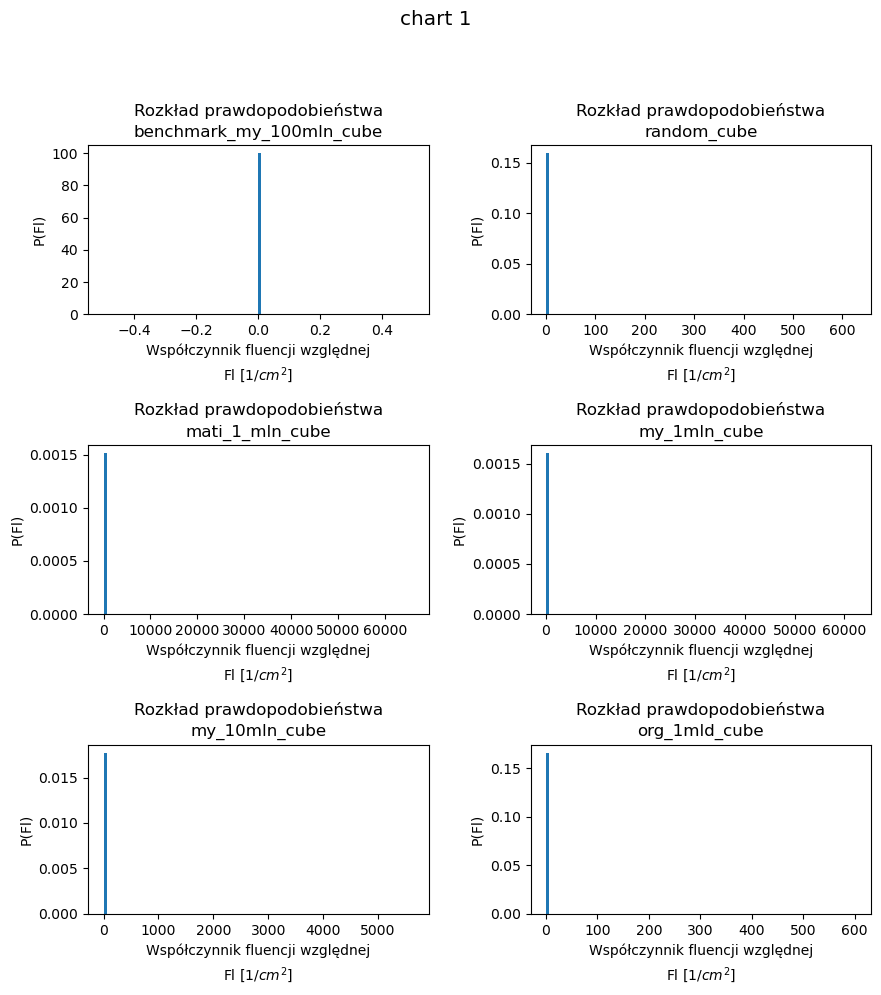

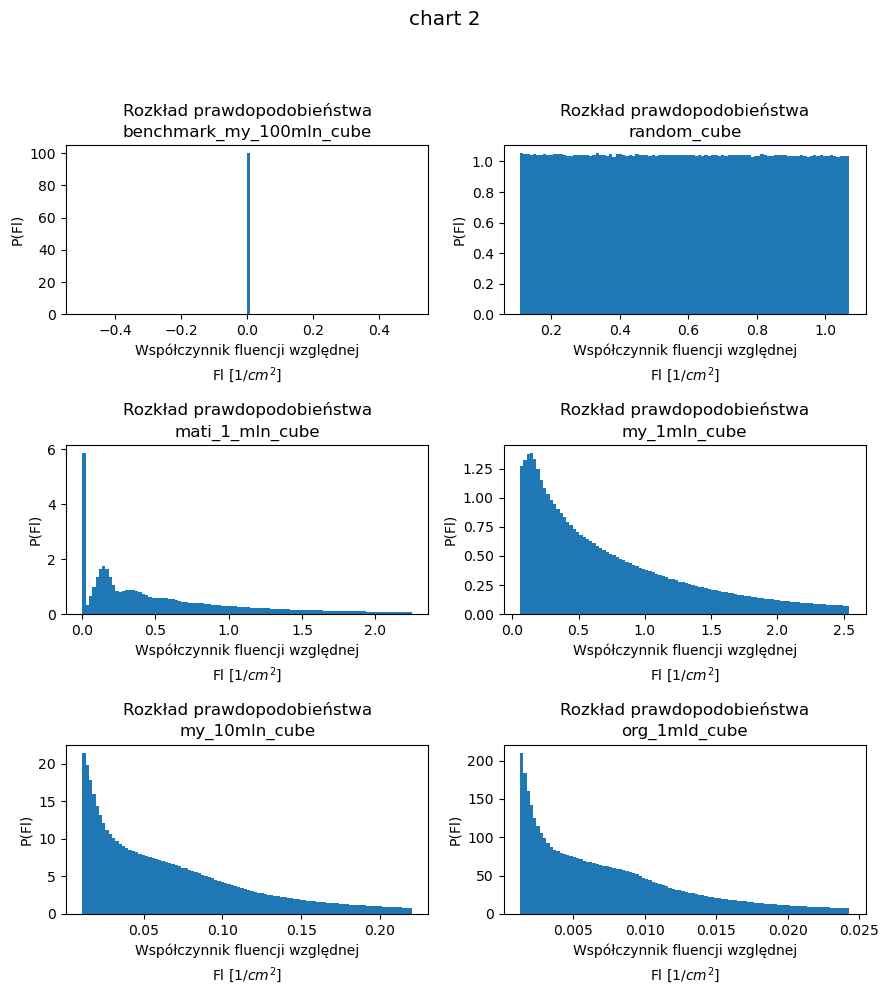

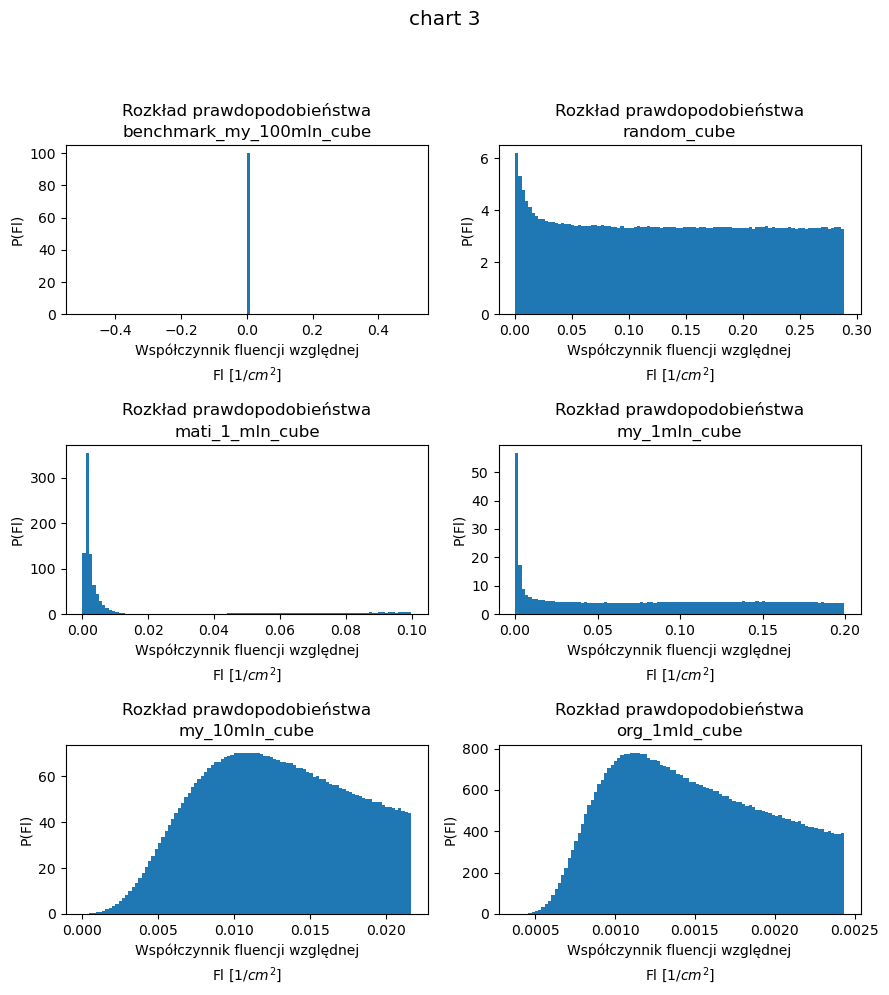

In [165]:
diff_all_cubes(all_cubes, benchmark_cube)

#### Histogram 3D

In [166]:
r = all_cubes[0]['cube']
r = np.arange(0,27).reshape((3,3,3))
r_reshaped = r.reshape(-1, 3)
h = np.histogramdd(r_reshaped, bins=(2,2,2), range=None, density=None, weights=None)
h

(array([[[4., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 5.]]]),
 [array([ 0., 12., 24.]), array([ 1., 13., 25.]), array([ 2., 14., 26.])])

In [167]:
all_hists3d = [np.histogramdd(c['cube'].reshape(-1, 3), bins=1000, range=None, density=None, weights=None)[0] for c in all_cubes]
benchmark_hist = all_hists3d[0]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=all_hists3d, benchmark_arr=benchmark_hist)
corr_table_universal(all_cubes, all_hists3d)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube          -0.00           0.16   6,717,669.82        2.6e+03            nan            nan
          mati_1_mln_cube           1.00           1.00           0.00          0.039            nan            nan
             my_1mln_cube           1.00           1.00           0.00         0.0098            nan            nan
            my_10mln_cube           1.00           1.00           0.00         0.0051            nan            nan
            org_1mld_cube           1.00           1.00           0.01          0.089            nan            nan

corrtable of flatten cubes
[[ 1.00000000e+00 -3.67665568e-04  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-3.6

## Przekroje i uśrednione przekroje

### przygotowanie

<img src="x_high_slices.png" width="300"/>
<img src="x_high_sum.png" width="300"/>
<img src="z_high_slices.png" width="300"/>
<img src="z_high_sum.png" width="300"/>

#### Przygotowanie ramek - przekrojów

In [122]:
def make_frames(cub_list, arr_list=None):
    for i in range(len(cub_list)):
        if arr_list is None:
            arr = cub_list[i]['cube']
        else:
            arr = arr_list[i]

        sh = arr.shape
        f = [None for _ in range(20)]

        # --- x_high ---
        # z tej strony wbijamy nóż cięcia slice

        # 3 vertical slices
        f[0] = arr[:,0,:]
        f[1] = arr[:,sh[1]//2,:]
        f[2] = arr[:,-1,:]
        
        # 3 horizontal slices
        f[3] = arr[:,:,-1]
        f[4] = arr[:,:,sh[0]//2]
        f[5] = arr[:,:,0]

        # sums have to be normalized -> division
        # avg y
        f[6] = arr.sum(axis=1) / sh[1]
        # avg z
        f[7] = arr.sum(axis=2) / sh[2]

        # --- z_high ---
        # z tej strony wbijamy nóż cięcia slice

        # 3 vertical slices
        sh = arr.shape
        f[8] = f[0]
        f[9] = f[1]
        f[10] = f[2]
        
        # 3 horizontal slices
        f[11] = arr[0,:,:]
        f[12] = arr[sh[0]//2,:,:]
        f[13] = arr[-1,:,:]

        # avg y
        f[14] = f[6]
        # avg x
        f[15] = arr.sum(axis=0) / sh[0]

        # --- 1D - sum along 2 axes

        # avg xy
        f[16] = arr.sum(axis=(0,1)) / sh[0] / sh[1]
        # avg xz
        f[17] = arr.sum(axis=(0,2)) / sh[0] / sh[2]

        # avg yz
        f[18] = arr.sum(axis=(1,2)) / sh[1] / sh[2]
        # avg xz
        f[19] = f[17]

        # --- save frames ---

        bpc = cub_list[i]['bins_per_1_cm']
        cub_list[i]['frames'] = f
        cub_list[i]['frame_names'] = [
            f"y_low, slice, const y={0: .2f}",
            f"y_low, slice, const y={sh[1]/2/bpc: .2f}",
            f"y_low, slice, const y={sh[1]/bpc: .2f}",

            f"z_high, slice, const z={sh[2]/bpc: .2f}",
            f"z_high, slice, const z={sh[2]/2/bpc: .2f}",
            f"z_high, slice, const z={0.0: .2f}",

            f"y_low\nśrednia wzdłuż osi y",
            f"z_high\nśrednia wzdłuż osi z",

            "",
            "",
            "",

            f"x_high, slice, const x={0.0: .2f}",
            f"x_high, slice, const x={sh[0]/2/bpc: .2f}",
            f"x_high, slice, const x={sh[0]/bpc: .2f}",

            "",
            f"x_high\nśrednia wzdłuż osi x",


            f"średnia wzdłuż osi x oraz y",
            f"średnia wzdłuż osi x oraz z",
            f"średnia wzdłuż osi y oraz z",
            "",
        ]

        cub_list[i]['frame_shortnames'] = [
            "y_low slice",
            "y_low slice",
            "y_low slice",

            "z_high slice",
            "z_high slice",
            "z_high slice",

            "avg_y y_low",
            "avg_z z_high",

            "",
            "",
            "",

            "x_high slice",
            "x_high slice",
            "x_high slice",

            "",
            "avg_x x_high",


            f"avg_xy",
            f"avg_xz",
            f"avg_yz",
            "",
        ]






make_frames(all_cubes)

#### Definicja funkcji rysujących mapy ciepła

wykresy - porównanie w siatce


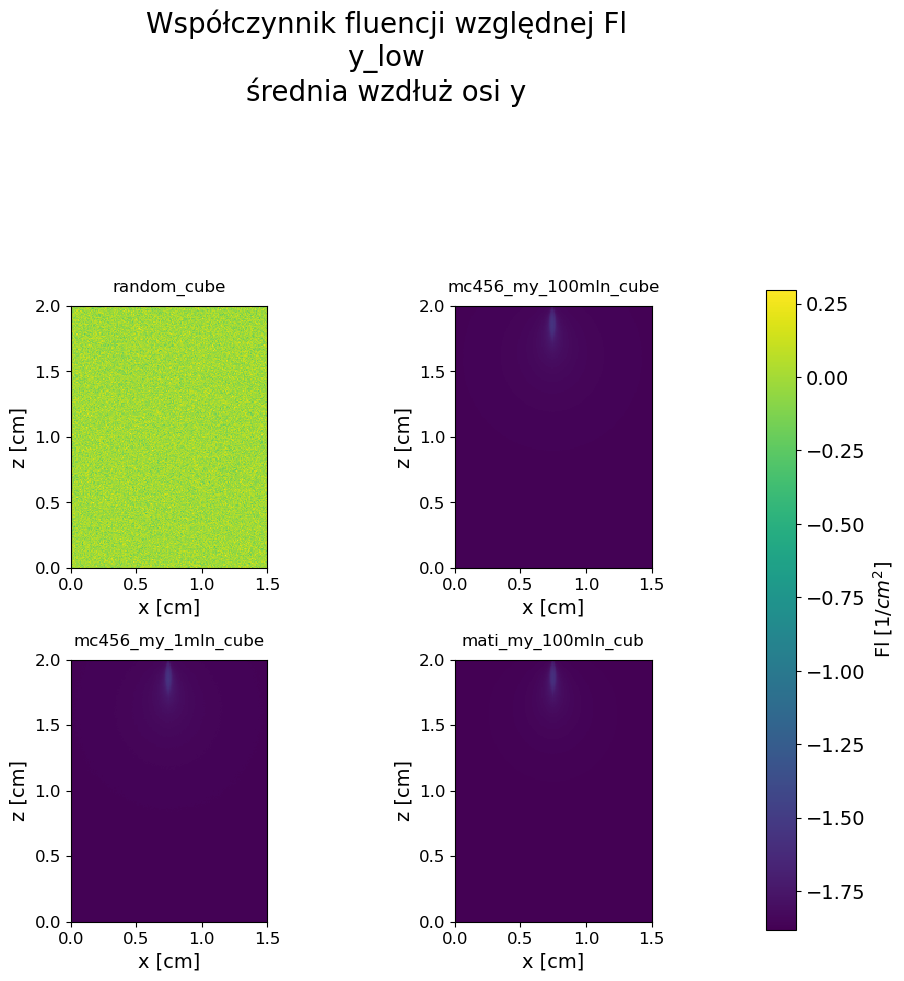

In [124]:
# ------------------------------- HEAT MAPS -------------------------------

# WARNING! if arr it's a sum along axis, remmember to divide by len(of this axis)
# do it before giving it to heatmap2d function
def heatmap2d(arr: np.ndarray, bins_per_cm, cube=None, title=None, norm="log"):

    # plt.tight_layout()

    # skip first tick on x axis
    # ax = plt.gca()
    # xticks = ax.xaxis.get_major_ticks()
    # xticks[0].label1.set_visible(False)
    
    title_out, xlab, ylab, extent, plot_arr = handle_plot_data(arr, title, bins_per_cm, cube=cube)

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title_out, pad=10, linespacing=1.5)

    # wyświetlenie tablicy
    plt.imshow(plot_arr, cmap='viridis', norm=norm, interpolation="none", extent=extent) # musi być przed color bar

    # kolorowy pasek ze skalą
    # cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb = plt.colorbar(pad=0.010)
    cb.set_label(r'Fl [$ 1/cm^2 $]')

    # manager = plt.get_current_fig_manager()
    # manager.window.showMaximized()
    # manager.canvas.toolbar.save_figure()

    plt.show()




def handle_plot_data(arr, title, bins_per_cm, cube=None):
    """
    Funkcja pomocnicza do obsługi różnych przypadków osi i przekształceń
    """
    xlab = ""
    ylab = ""
    title_out = "Współczynnik fluencji względnej Fl"
    title_out += "\n" + title if title is not None else ""
    title_out += "\n" + cube['name'] if cube is not None else ""
    if "x_high" in title_out:
        xlab = "y [cm]"
        ylab = "z [cm]"
        plot_arr = np.flip(arr.transpose(), axis=(0))
        extent=[0, arr.shape[0]/bins_per_cm, 0, arr.shape[1]/bins_per_cm] # podziałka legendy
    elif "x_low" in title_out:
        xlab = "y [cm]"
        ylab = "z [cm]"
    elif "y_high" in title_out:
        xlab = "x [cm]"
        ylab = "z [cm]"
    elif "y_low" in title_out:
        xlab = "x [cm]"
        ylab = "z [cm]"
        # obracanie tablicy
        plot_arr = np.flip(arr.transpose(), axis=(0))
        extent=[0, arr.shape[0]/bins_per_cm, 0, arr.shape[1]/bins_per_cm] # podziałka legendy
    elif "z_high" in title_out:
        xlab = "y [cm]"
        ylab = "x [cm]"
        # obracanie tablicy
        # plot_arr = np.flip(arr.transpose(), axis=(0))
        plot_arr = arr
        extent=[0, arr.shape[0]/bins_per_cm, arr.shape[1]/bins_per_cm, 0] # podziałka legendy
        plt.gca().xaxis.set_label_position('top')  # Move xlabel to the top
        plt.gca().xaxis.tick_top()  # Move the ticks to the top
    elif "z_low" in title_out:
        xlab = "y [cm]"
        ylab = "x [cm]"
    else:
        plot_arr = arr
    return title_out, xlab, ylab, extent, plot_arr




def heatmap2d_grid_shared_colorbar(arr_list: list, bins_per_cm, grid_shape: tuple, cube_list=None, main_title=None, norm="log"):
    """
    Wyświetla tablice w układzie siatki (grid) z wspólną skalą kolorów i jednym colorbar.
    
    Parametry:
    - arr_list: lista tablic numpy, które mają być wyświetlone,
    - bins_per_cm: wartość określająca ilość binów na centymetr,
    - grid_shape: krotka (rows, cols) określająca ilość wierszy i kolumn w siatce,
    - main_title: wspólny tytuł dla wszystkich wykresów, opcjonalny,
    - norm: sposób normalizacji, domyślnie "log".
    """

    # Obliczanie wspólnych minimalnych i maksymalnych wartości dla wszystkich tablic
    global_min = np.min([np.min(arr) for arr in arr_list])
    global_max = np.max([np.max(arr) for arr in arr_list])

    # Wybór normy
    if norm == "log":
        norm = LogNorm(vmin=global_min, vmax=global_max)
    else:
        norm = Normalize(vmin=global_min, vmax=global_max)

    # Inicjalizacja wykresu z określoną siatką
    rows, cols = grid_shape
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

    # Zamiana jednowymiarowej tablicy axes na dwuwymiarową, jeśli siatka jest większa niż 1x1
    if rows * cols > 1:
        axes = axes.ravel()

    # Przejście przez wszystkie tablice i rysowanie ich w odpowiednich podwykresach
    for i, arr in enumerate(arr_list):
        ax = axes[i] if rows * cols > 1 else axes

        # Obsługa osi i przekształceń
        title_out, xlab, ylab, extent, plot_arr = handle_plot_data(arr, main_title, bins_per_cm)
        small_title = cube_list[i]['name']
        ax.set_title(small_title, pad=10)

        # Rysowanie wykresu
        ax.set_xlabel(xlab, fontsize=14)
        ax.set_ylabel(ylab, fontsize=14)

        # Rysowanie mapy ciepła z wspólną normą dla wszystkich wykresów
        im = ax.imshow(plot_arr, cmap='viridis', norm=norm, interpolation="none", extent=extent)

        # Zwiększenie rozmiaru czcionek na osiach
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Dodanie wspólnego colorbara po prawej stronie
    fig.subplots_adjust(left=0.1, right=0.85, wspace=0.05, hspace=0.35)  # Minimalny odstęp między wykresami
    cbar_ax = fig.add_axes([0.88, 0.1, 0.03, 0.8])  # Zmniejszenie odstępu między wykresami a colorbar
    cb = fig.colorbar(im, cax=cbar_ax)
    cb.set_label(r'Fl [$ 1/cm^2 $]', fontsize=14, linespacing=1.5)  # Etykieta paska kolorów
    cb.ax.tick_params(labelsize=14)  # Zwiększenie czcionki skali na colorbar

    # Ustawienie wspólnego tytułu nad wszystkimi wykresami, wyżej, aby nie nachodził na wykresy
    if main_title is not None:
        fig.suptitle(title_out, fontsize=20, y=1.25)  # Przesunięcie tytułu wyżej

    plt.savefig('chart4_img/chart4.png', bbox_inches='tight')
    plt.show()









# ------------------------------- PRINT ALL HEATMAPS -------------------------------










def print_all_frames(all_cubes, frame_ids=None):
    frame_ids = list(range(0,8))+list(range(11,14))+[15] if frame_ids is None else frame_ids
    for c in range(len(all_cubes)):
        for i in frame_ids:
            bins_per_cm = all_cubes[0]['bins_per_1_cm']
            title = all_cubes[0]['frame_names'][i]
            arr1 = all_cubes[c]['frames'][i]

            # check axis
            arr1 = arr1.copy()
            arr1[0:20, 0:20] = 20 # niskie wartości, początek (0,0)
            arr1[-20:-1, -20:-1] = 60 # wysokie wartości, koniec (1.5, 2.0)

            heatmap2d(arr1, bins_per_cm, title=title)


def print_all_frames_beside_benchmark(all_cubes, benchmark_cube, frame_ids=None):
    frame_ids = list(range(0,8))+list(range(11,14))+[15] if frame_ids is None else frame_ids
    for c in range(len(all_cubes)):
        for i in frame_ids:
            bins_per_cm = all_cubes[0]['bins_per_1_cm']
            title = all_cubes[0]['frame_names'][i]
            arr1 = all_cubes[c]['frames'][i]

            # check axis
            arr1 = arr1.copy()
            arr1[0:20, 0:20] = 20 # niskie wartości, początek (0,0)
            arr1[-20:-1, -20:-1] = 60 # wysokie wartości, koniec (1.5, 2.0)

            cube_list = [arr1, benchmark_cube['frames'][i]]
            heatmap2d_grid_shared_colorbar(cube_list, bins_per_cm, grid_shape=(1,2), main_title=title)









# print("wykresy - zestawienie do benchmarku")
# temp_cub_list = [cube for cube in all_cubes if 'benchmark' in cube['name']]
# print_all_frames_beside_benchmark(all_cubes, temp_cub_list[0])




print("wykresy - porównanie w siatce")
frame_id = 6
arr_list = [cube['frames'][frame_id] for cube in all_cubes[0:4]]
cube_list = all_cubes[0:4]
bins_per_cm = all_cubes[0]['bins_per_1_cm']
title = all_cubes[0]['frame_names'][frame_id]
titles = [title for _ in range(len(arr_list))]
heatmap2d_grid_shared_colorbar(arr_list, bins_per_cm, grid_shape=(2,2), cube_list=cube_list, main_title=title, norm="log")

#### usuwanie pustej przestrzeni, aby ścisnąć wykres

In [202]:
def detect_and_split_image_with_vertical_trim(image_path, output_path, gap_threshold=20, pixel_threshold=220, new_gap=20):
    """
    Funkcja wczytuje obraz, wykrywa poziome przerwy szersze niż gap_threshold - wycina je, a w dolnej części, pod tym wyciętym pasem
    obrazu wykrywa białe kolumny pionowe powyżej pixel_threshold i zmniejsza je do 10% ich pierwotnej szerokości.
    Następnie łączy górną i dolną część w jeden obraz.

    Parametry:
    - image_path: ścieżka do pliku wejściowego .png
    - output_path: ścieżka do zapisu wynikowego obrazu
    - gap_threshold: minimalna szerokość przerwy, aby została uznana za "przerwę"
    - pixel_threshold: próg jasności dla wykrywania białych pikseli (im mniejsza wartość, tym większa czułość)
    """
    
    # Wczytanie obrazu
    img = Image.open(image_path)
    img_color = img.copy()  # Zachowanie oryginalnego obrazu w kolorze
    img_gray = img.convert("L")  # Konwersja do skali szarości tylko dla operacji detekcji
    img_array = np.array(img_gray)  # Konwersja do tablicy numpy

    # Szukamy poziomych przerw (obszarów, gdzie piksele są "białe" lub bardzo jasne na całej szerokości)
    horizontal_sum = np.sum(img_array > pixel_threshold, axis=1)  # Liczymy piksele jaśniejsze niż pixel_threshold
    img_width = img_array.shape[1]

    # Zwiększamy dokładność wykrywania przerw
    gaps = np.where(horizontal_sum >= img_width * 1.0)[0]  # Wiersze, gdzie cała szerokość wiersza jest biała

    # Szukamy linii, gdzie przerwa jest większa niż gap_threshold
    large_gaps = []
    current_gap = []
    for i in range(1, len(gaps)):
        if gaps[i] - gaps[i-1] > 1:  # Kiedy przerwa między kolejnymi białymi liniami jest większa niż 1
            if len(current_gap) > gap_threshold:  # Jeśli przerwa ma odpowiednią szerokość
                large_gaps.append(current_gap)
            current_gap = []  # Resetujemy przerwę
        current_gap.append(gaps[i])

    if len(current_gap) > gap_threshold:
        large_gaps.append(current_gap)

    if not large_gaps:
        raise ValueError("Nie znaleziono żadnej przerwy większej niż threshold.")

    # Wybieramy pierwszą dużą przerwę
    first_large_gap = large_gaps[0]
    gap_start = first_large_gap[0]
    gap_end = first_large_gap[-1]

    # Dzielimy obraz na górną i dolną część
    top_part = img_color.crop((0, 0, img.width, gap_start))
    bottom_part = img_color.crop((0, gap_end, img.width, img.height))
    bottom_array = np.array(bottom_part.convert("L"))  # Skala szarości dla dolnej części

    # Szukamy pionowych białych kolumn TYLKO w dolnej części obrazu
    vertical_sum = np.sum(bottom_array > pixel_threshold, axis=0)  # Sumujemy piksele jaśniejsze niż próg w każdej kolumnie
    white_columns = np.where(vertical_sum >= bottom_part.height * 1.0)[0]  # Kolumny, które mają powyżej 95% białych pikseli

    # Tworzymy nową listę kolumn, gdzie białe kolumny zostaną zmniejszone do 10% szerokości
    reduced_columns = []
    i = 0
    while i < bottom_part.width:
        if i in white_columns:
            # Zmniejszamy szerokość białych kolumn do 10%
            col_start = i
            col_end = i
            while col_end < bottom_part.width and col_end in white_columns:
                col_end += 1
            # Zostawiamy tylko 10% szerokości
            reduced_width = max(1, int(0.1 * (col_end - col_start)))
            reduced_columns.append(bottom_part.crop((col_start, 0, col_start + reduced_width, bottom_part.height)))
            i = col_end  # Przeskakujemy białe kolumny
        else:
            # Normalna kolumna
            reduced_columns.append(bottom_part.crop((i, 0, i + 1, bottom_part.height)))
            i += 1

    # Łączymy wszystkie kolumny w nowy obraz dla dolnej części
    new_bottom_width = sum([col.width for col in reduced_columns])
    reduced_bottom_part = Image.new('RGB', (new_bottom_width, bottom_part.height))
    
    x_offset = 0
    for col in reduced_columns:
        reduced_bottom_part.paste(col, (x_offset, 0))
        x_offset += col.width

    # Dopasowanie szerokości górnej części do szerokości dolnej części
    top_part_width = top_part.width
    width_diff = top_part_width - new_bottom_width

    if width_diff > 0:
        # Przycinamy górną część po bokach, aby dopasować do dolnej części
        left_crop = width_diff // 2
        right_crop = width_diff - left_crop
        new_top_part = top_part.crop((left_crop, 0, top_part_width - right_crop, top_part.height))
    else:
        # Jeśli szerokość górnej części jest mniejsza lub równa, nie przycinamy
        new_top_part = top_part

    # Łączenie górnej i dolnej części
    default_color = tuple(np.array(img_color)[0,0])
    final_img = Image.new('RGB', (new_bottom_width, new_top_part.height + new_gap+ reduced_bottom_part.height), color=default_color)
    final_img.paste(new_top_part, (40, 0)) # colorbar odstaje 48px
    final_img.paste(reduced_bottom_part, (0, new_top_part.height + new_gap))

    # Wyświetlanie i zapisywanie obrazu
    final_img.show()
    final_img.save(output_path)
    print(f"Wynikowy obraz zapisany do {output_path}")




# Przykład użycia
detect_and_split_image_with_vertical_trim('chart4_img/chart4.png', 'chart4_img/output_combined.png', gap_threshold=16, pixel_threshold=220, new_gap=20)


Wynikowy obraz zapisany do chart4_img/output_combined.png


#### malutki przykład

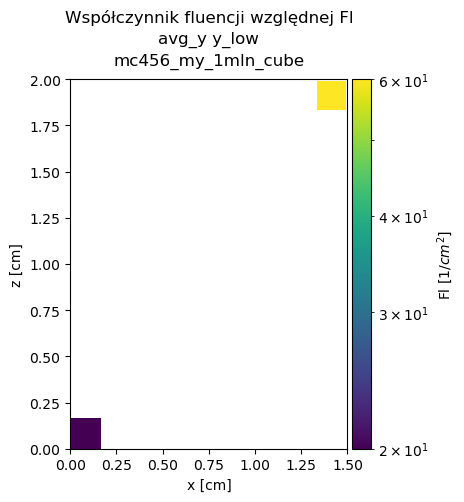

In [128]:
c = 2
i = 6
bins_per_cm = all_cubes[c]['bins_per_1_cm']
title = all_cubes[c]['frame_shortnames'][i]
arr = all_cubes[c]['frames'][i]
arr2 = all_cubes[c]['frames'][i]
arr1 = arr

# check axis
arr = arr.copy()
arr[0:20, 0:20] = 20 # niskie wartości, początek (0,0)
arr[-20:-1, -20:-1] = 60 # wysokie wartości, koniec (1.5, 2.0)

cube = all_cubes[c]

heatmap2d(arr, bins_per_cm, cube=cube, title=title)
# plot2_heatmap2d(arr1, arr2, title1=None, title2=None)

### Wszystkie wykresy przekrojów

In [130]:
[print(cube['name']) for cube in all_cubes]

random_cube
mc456_my_100mln_cube
mc456_my_1mln_cube
mati_my_100mln_cub
mati_my_1mln_cube
p_my_10mln_cube
mc456_my_10mln_cube
org_100mln_cube
org_1mln_cube
mati_org_10mln_cube
mati_org_1mln_cube


[None, None, None, None, None, None, None, None, None, None, None]

In [131]:
used_frames = [i for i in range(len(all_cubes[0]['frames'])) if all_cubes[0]['frame_names'][i] != ""]
used_frames_num = len(used_frames) - 3
print('used_frames_num', used_frames_num)

used_frames_num 12


#### benchmark

In [132]:
print("wykresy - benchmark - najlepsza symulacja")
temp_cub_list = [cube for cube in all_cubes if 'benchmark' in cube['name']]
print_all_frames(temp_cub_list)

wykresy - benchmark - najlepsza symulacja


#### random_cube

wykresy - random_cube


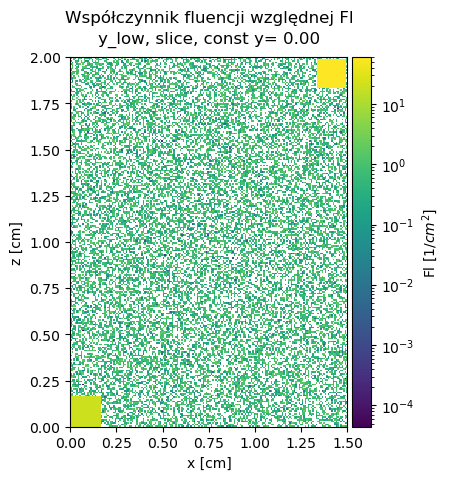

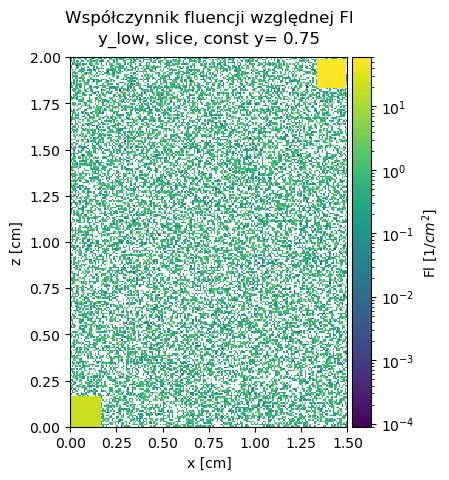

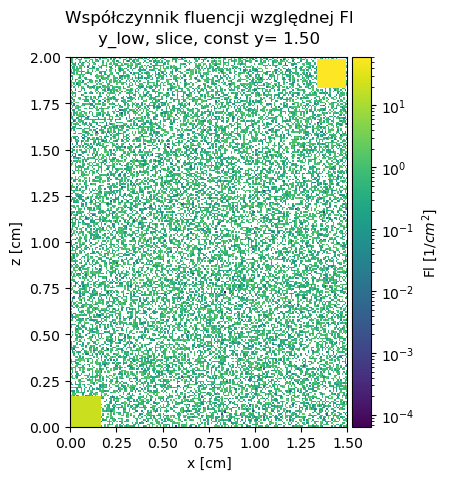

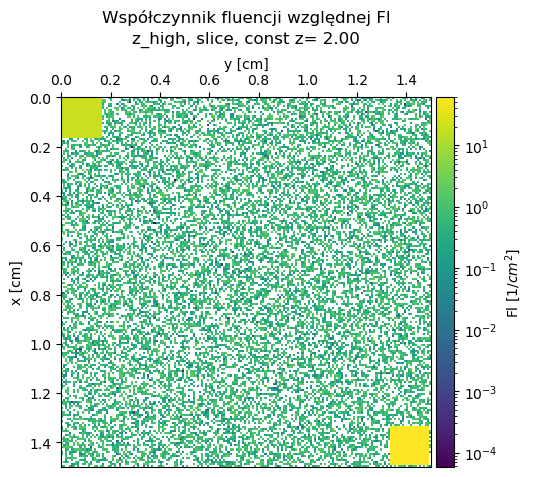

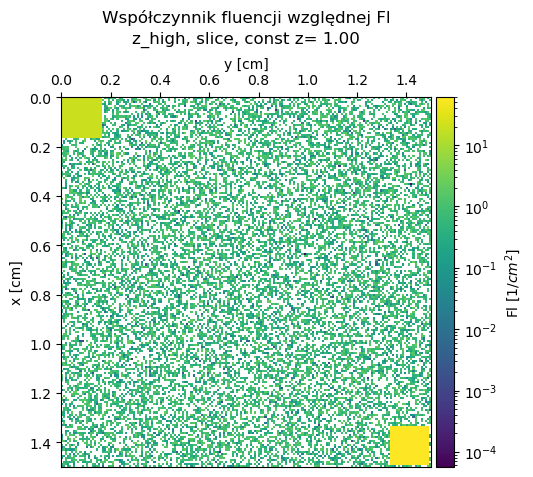

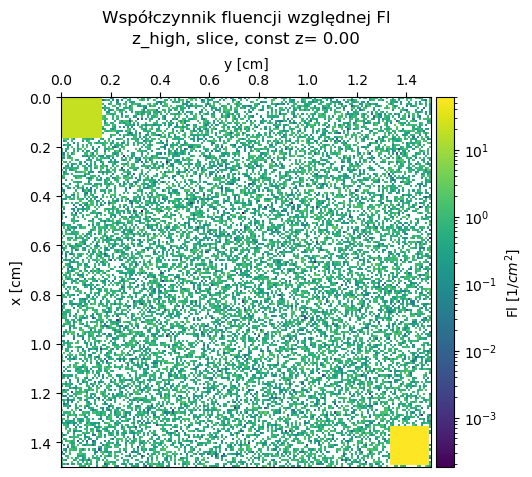

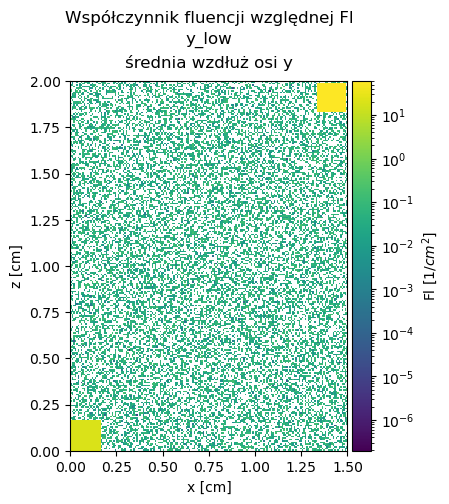

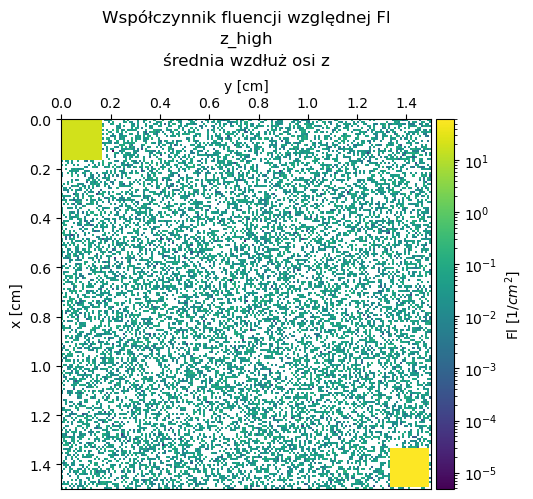

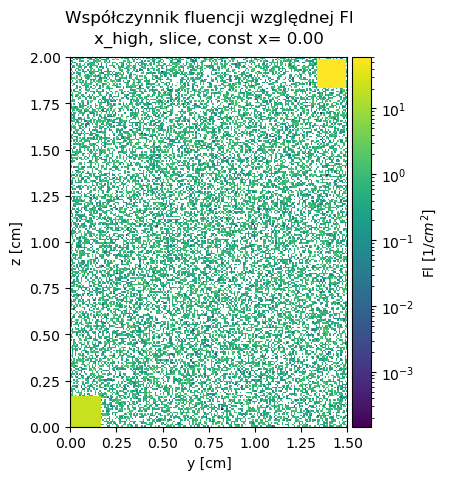

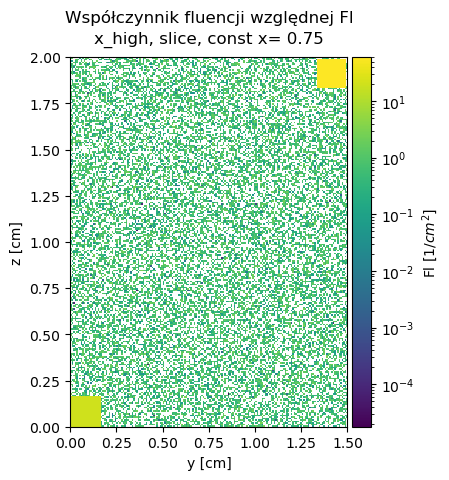

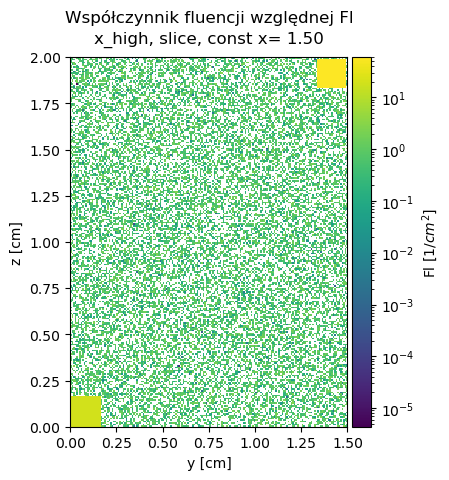

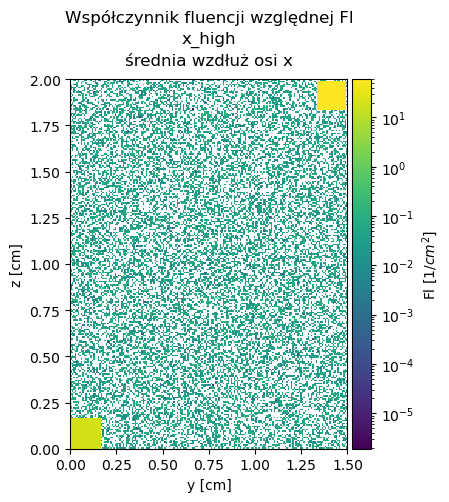

In [133]:
print("wykresy - random_cube")
temp_cub_list = [cube for cube in all_cubes if 'random_cube' in cube['name']]
print_all_frames(temp_cub_list)

#### moja symulacja

In [134]:
print("wykresy - moja symulacja")
temp_cub_list = [cube for cube in all_cubes if 'mati_1_mln_cube' in cube['name']]
print_all_frames(temp_cub_list)

wykresy - moja symulacja


#### my_1mln_cube

wykresy - my_1mln_cube


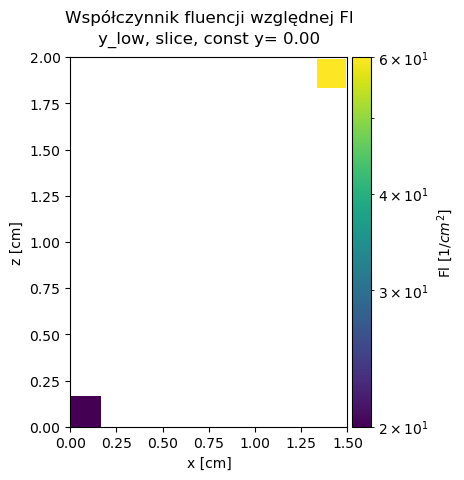

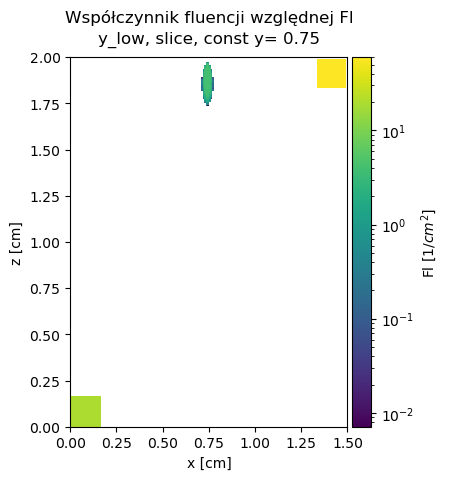

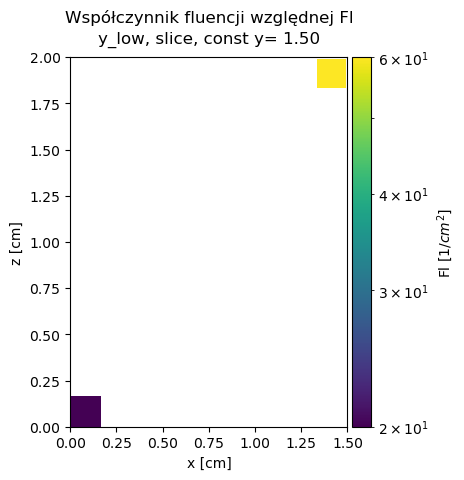

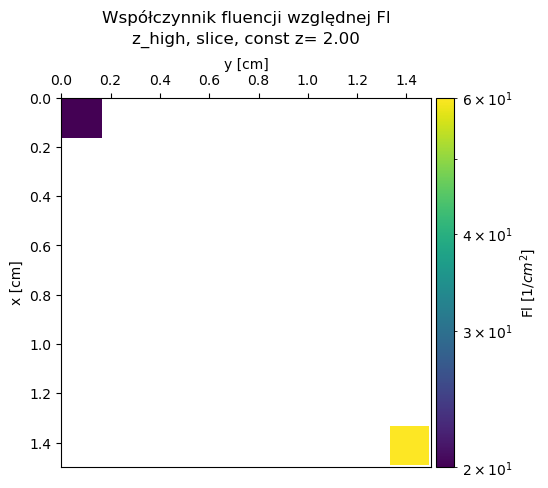

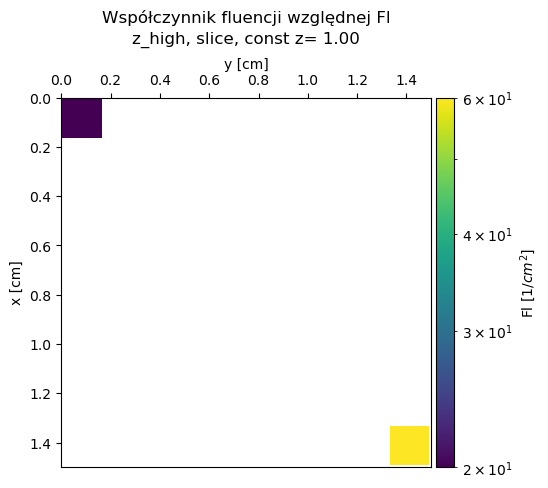

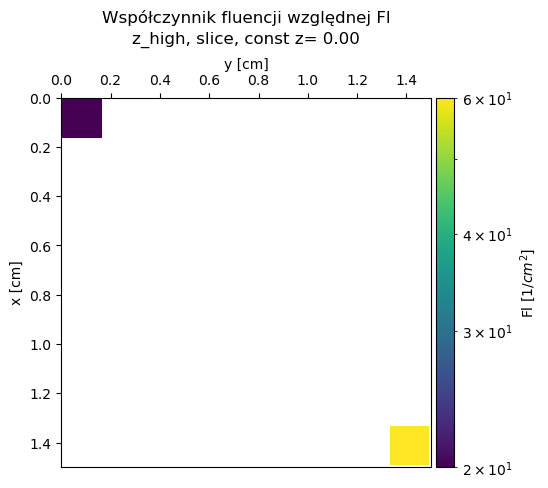

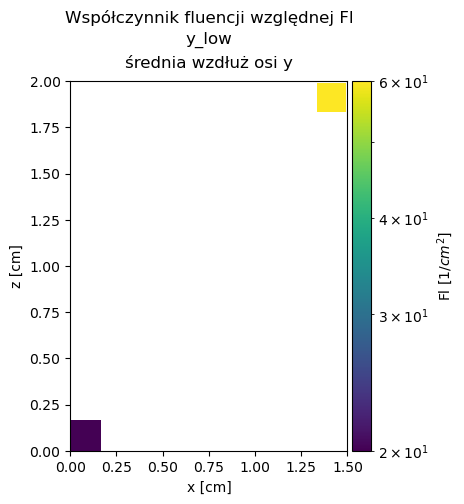

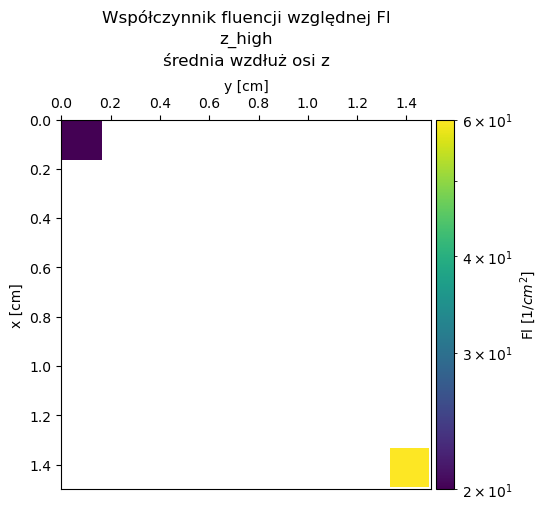

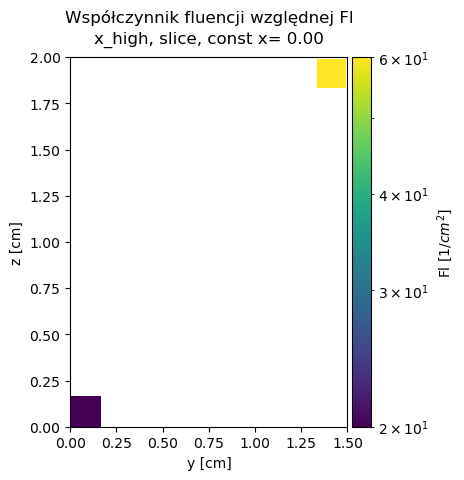

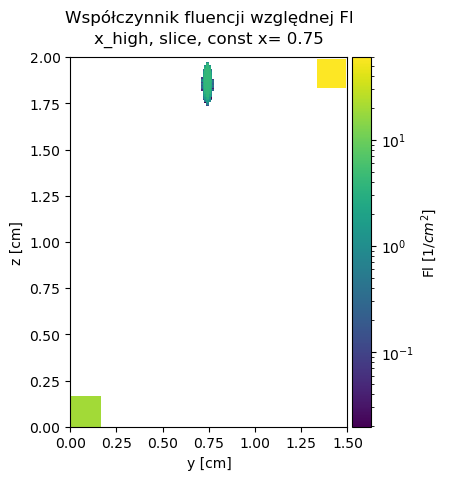

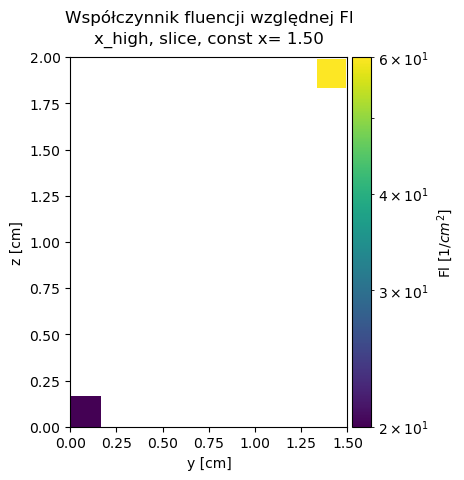

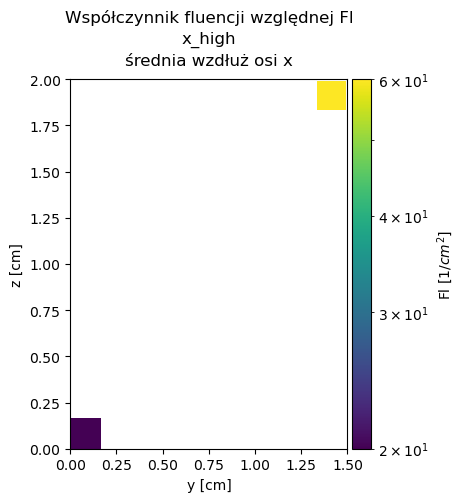

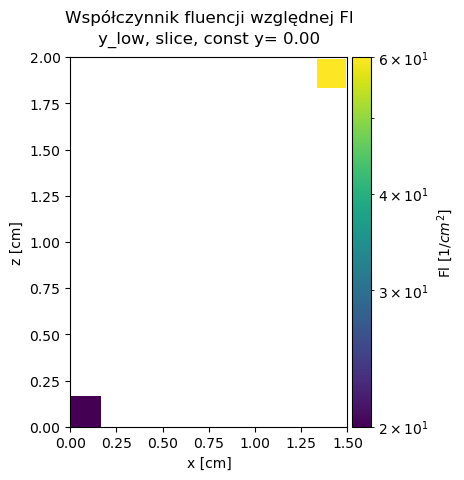

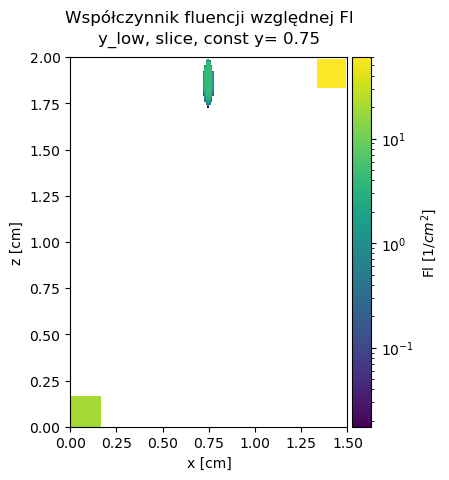

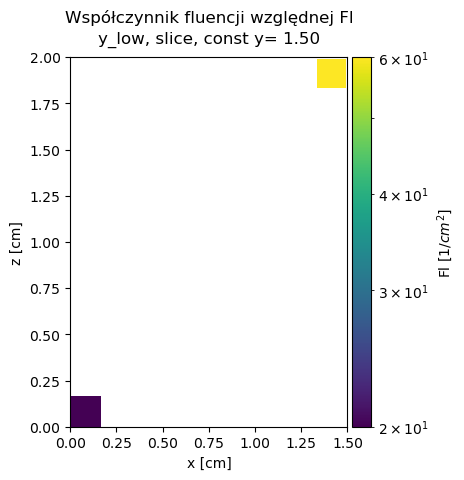

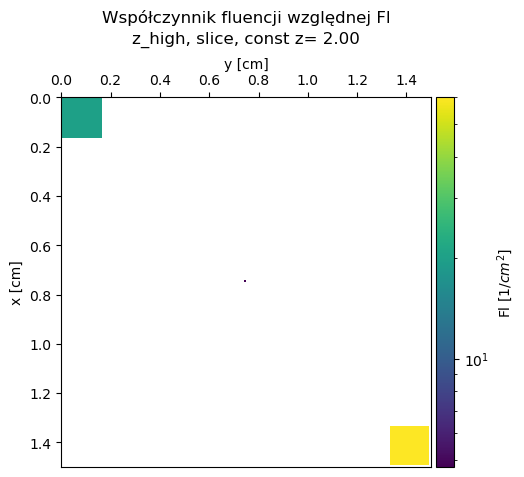

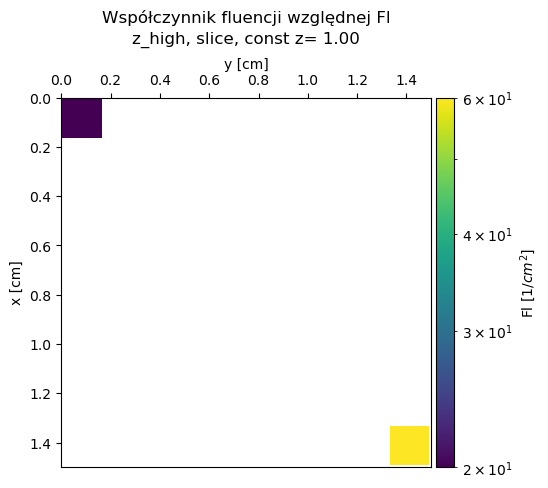

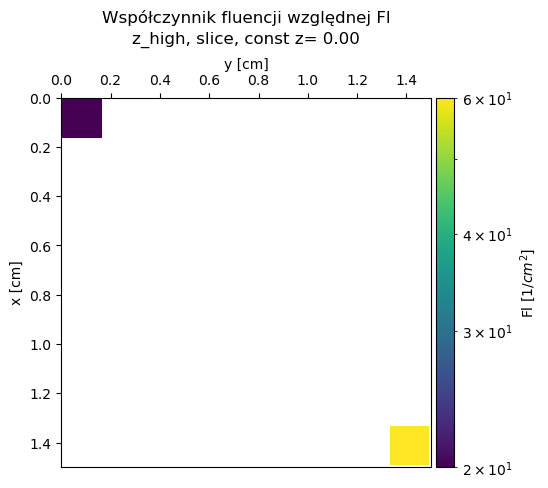

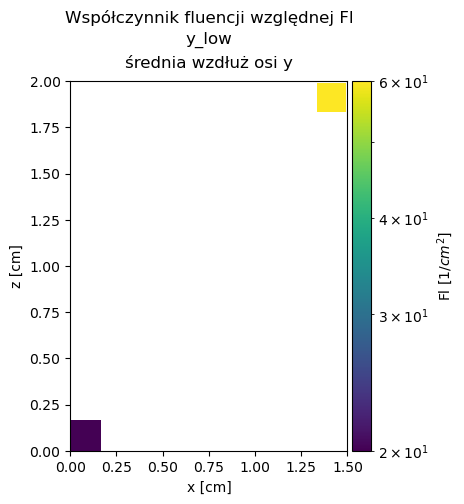

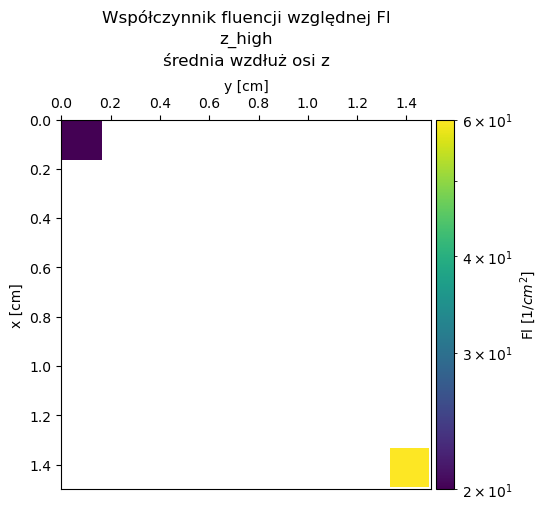

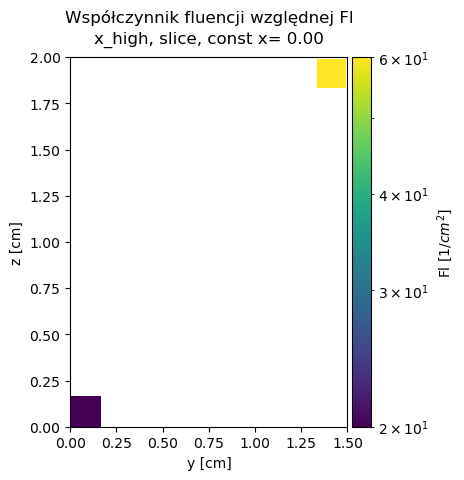

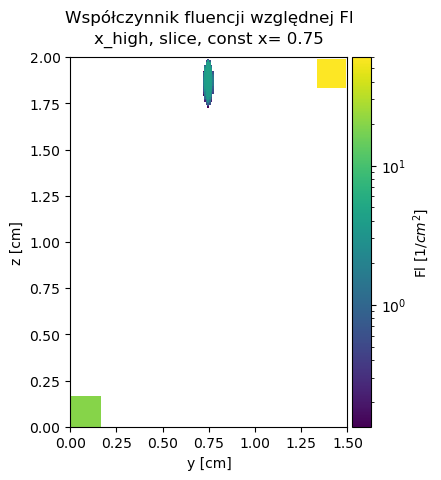

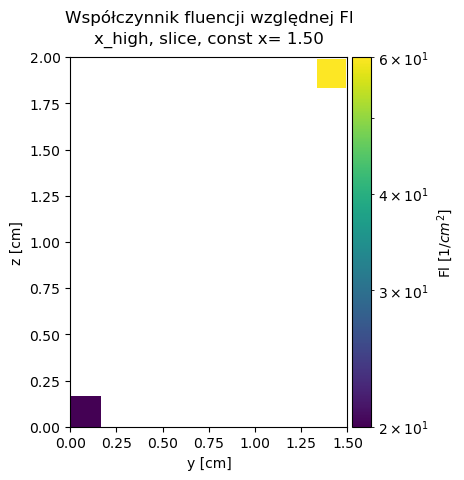

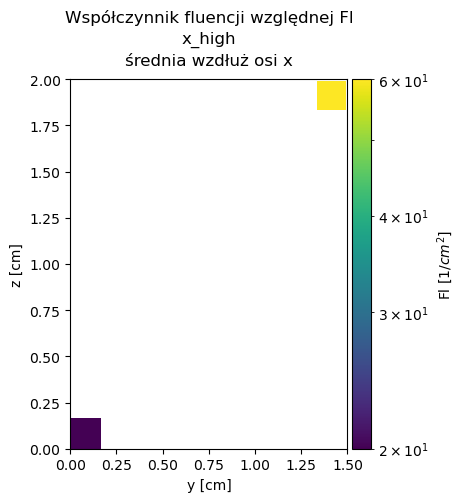

In [135]:
print("wykresy - my_1mln_cube")
temp_cub_list = [cube for cube in all_cubes if 'my_1mln_cube' in cube['name']]
print_all_frames(temp_cub_list)

#### my_10mln_cube

wykresy - my_10mln_cube


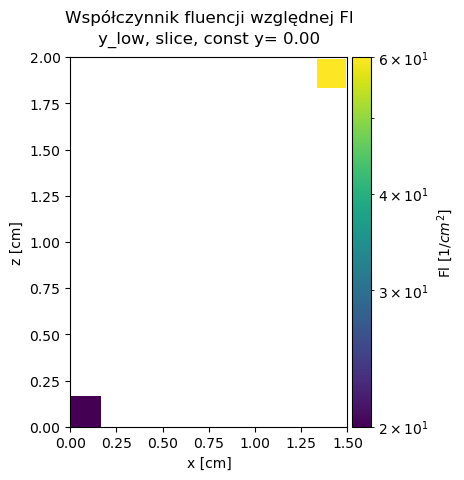

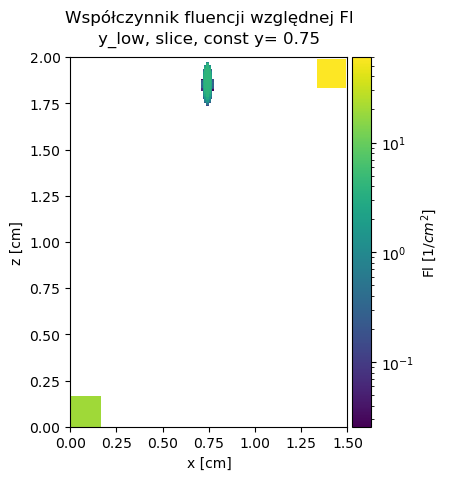

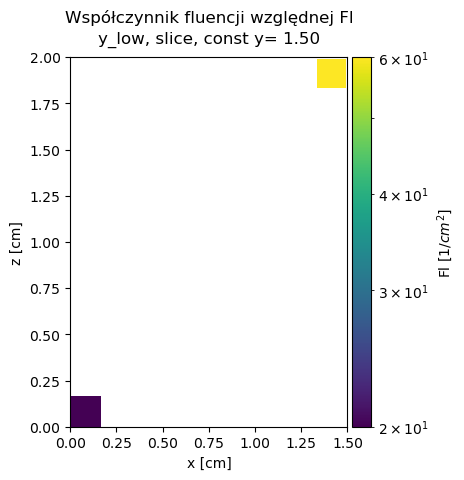

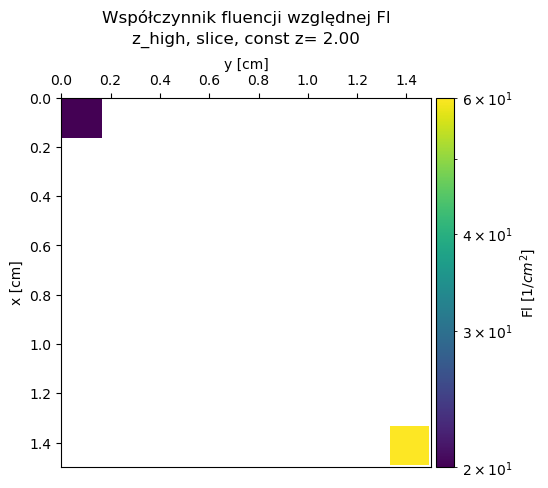

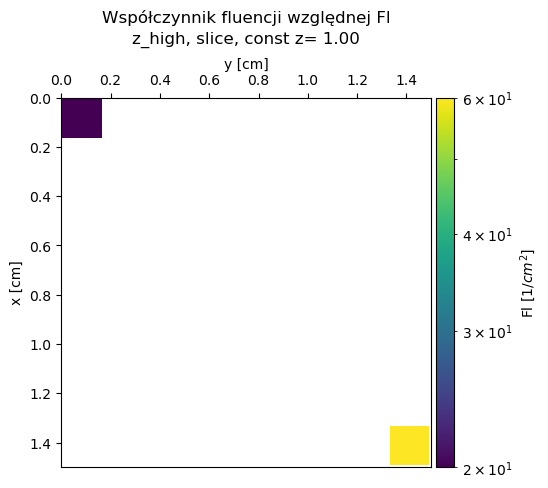

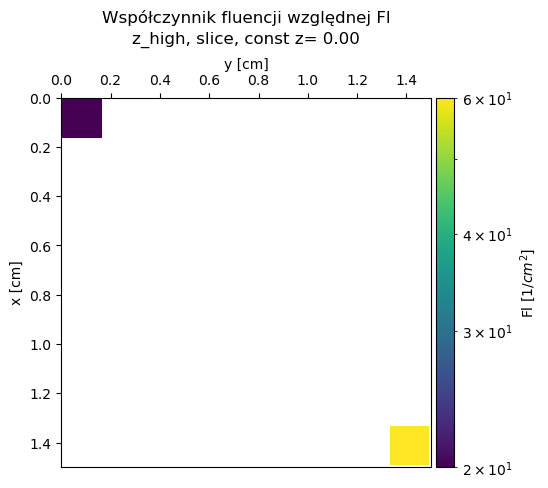

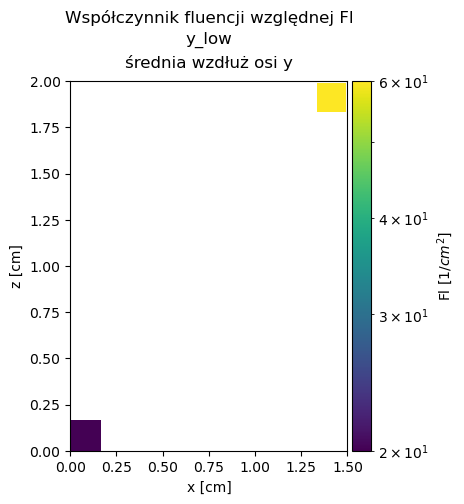

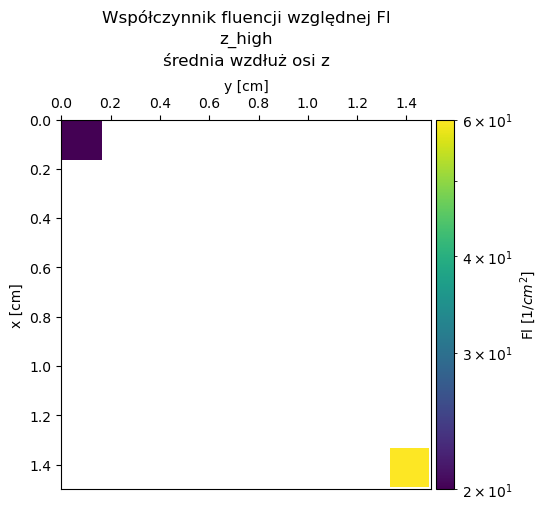

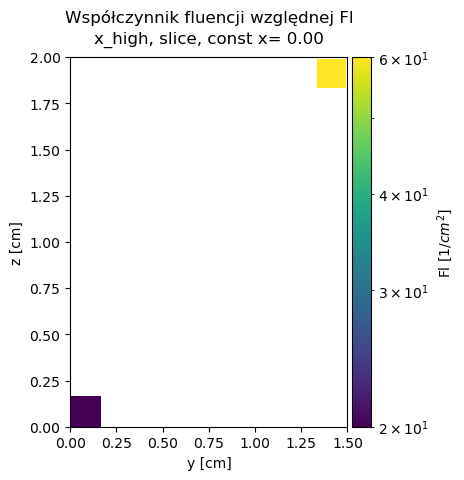

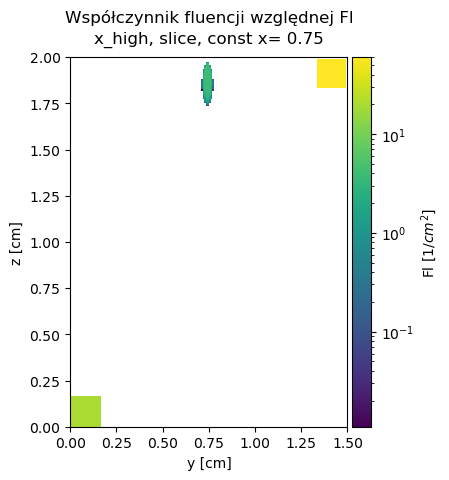

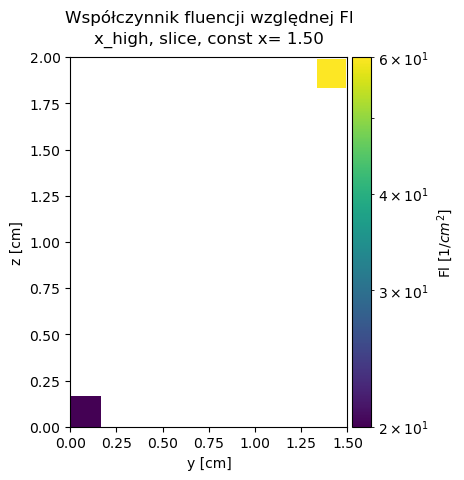

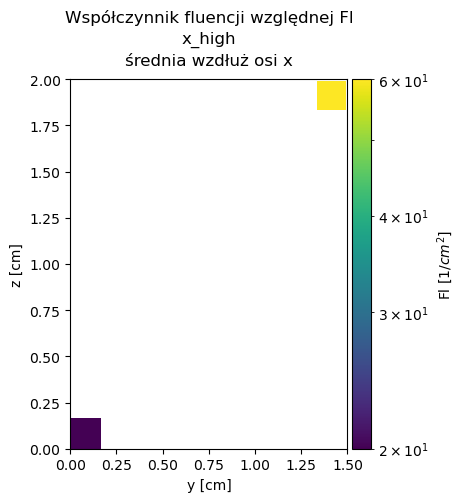

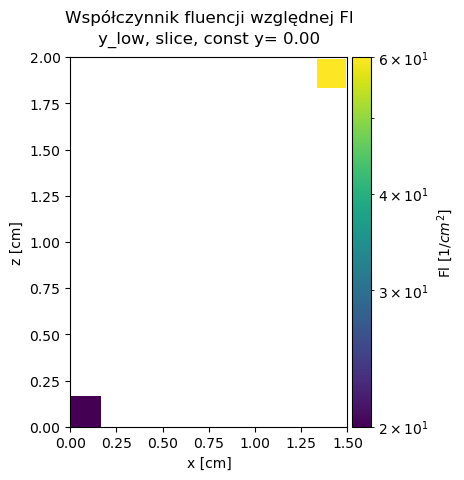

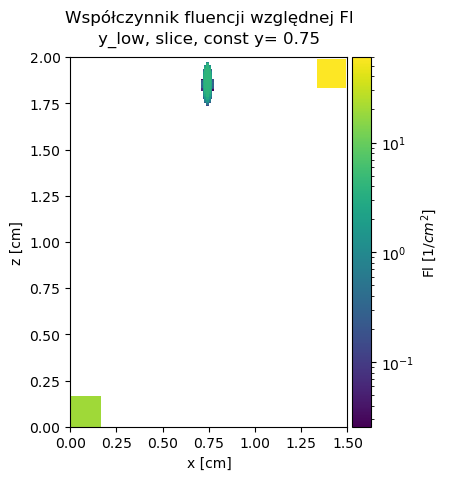

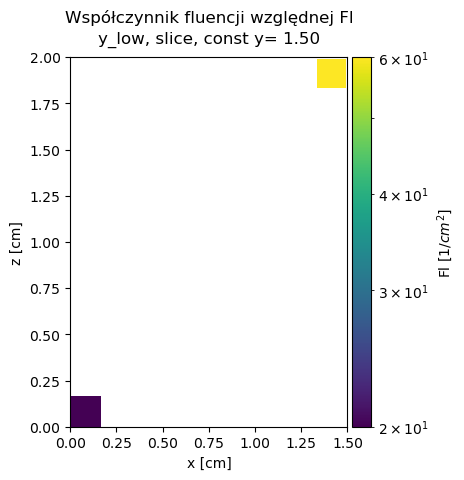

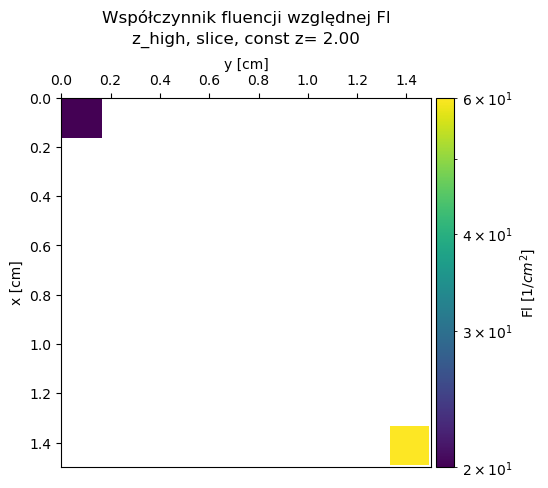

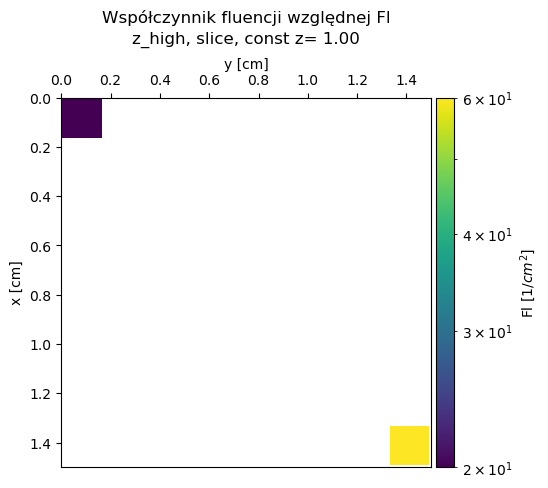

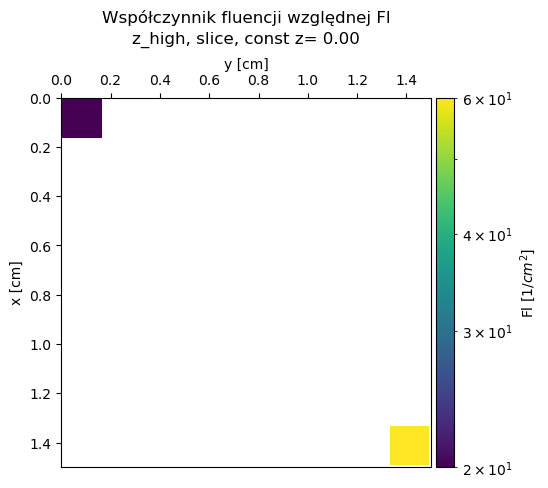

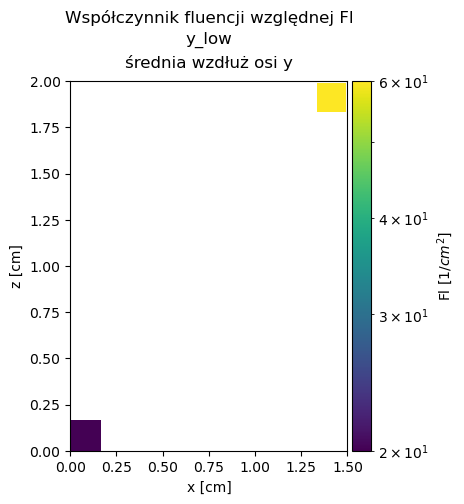

KeyboardInterrupt: 

In [136]:
print("wykresy - my_10mln_cube")
temp_cub_list = [cube for cube in all_cubes if 'my_10mln_cube' in cube['name']]
print_all_frames(temp_cub_list)

#### org_1mld_cube

wykresy - org_1mld_cube


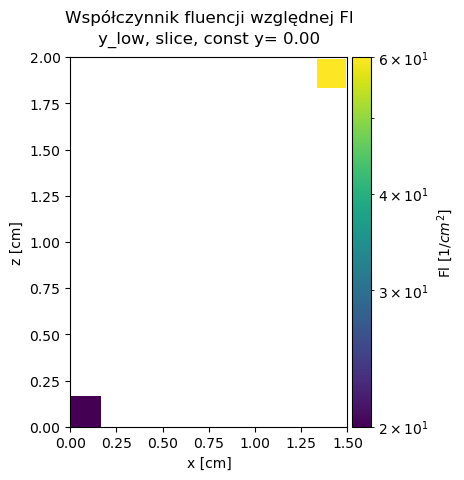

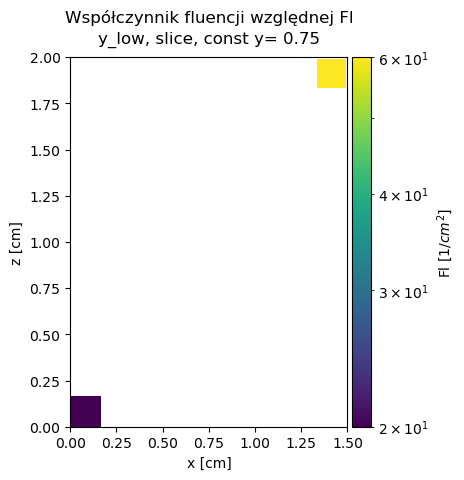

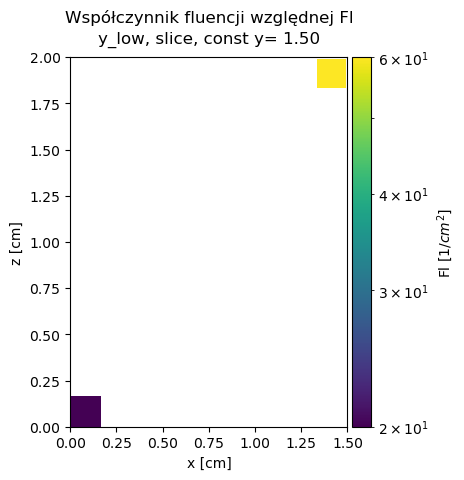

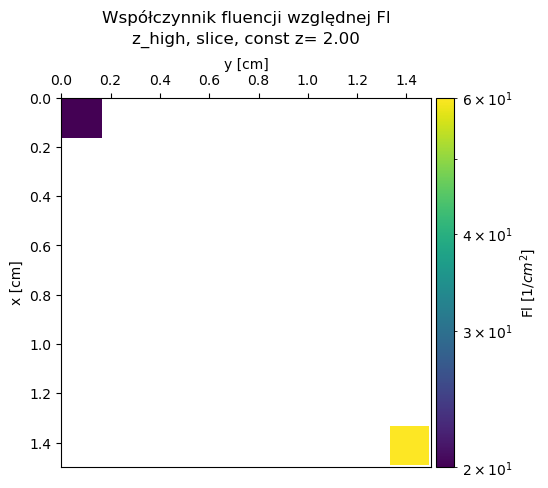

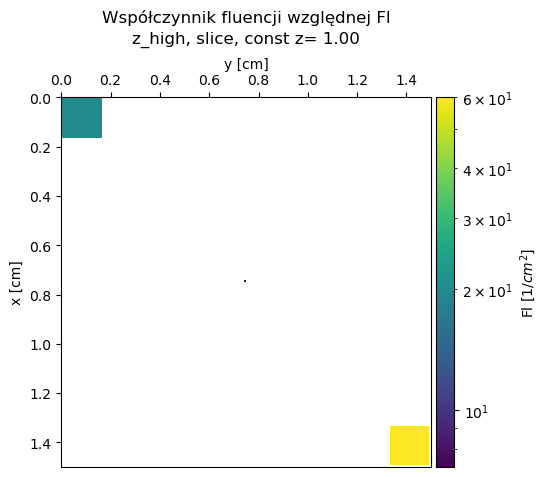

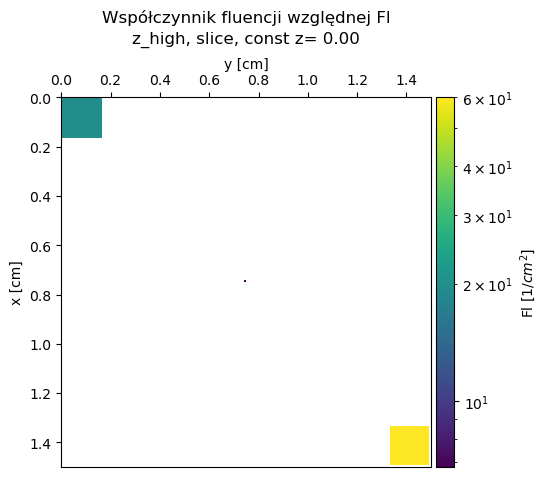

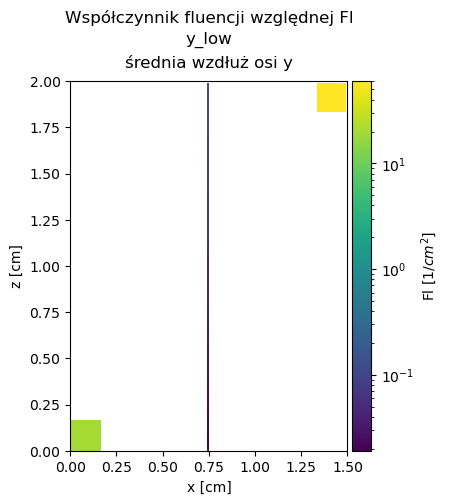

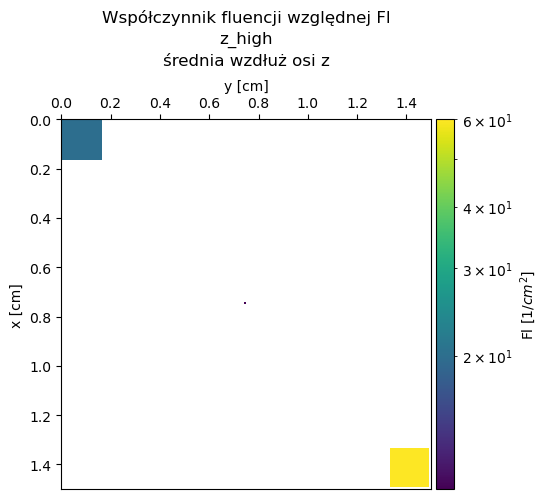

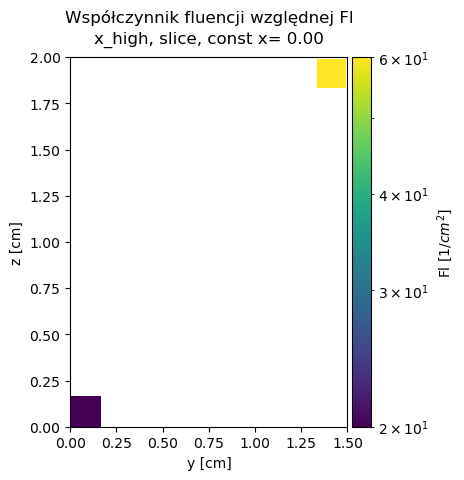

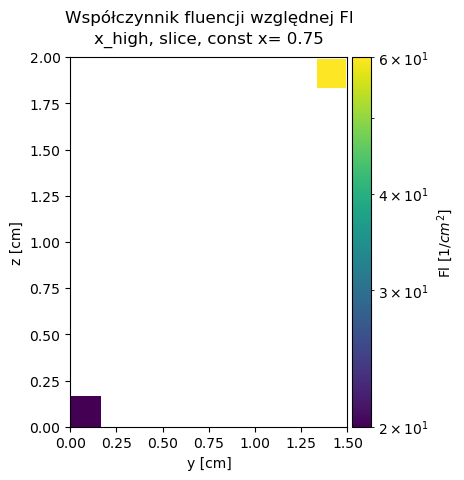

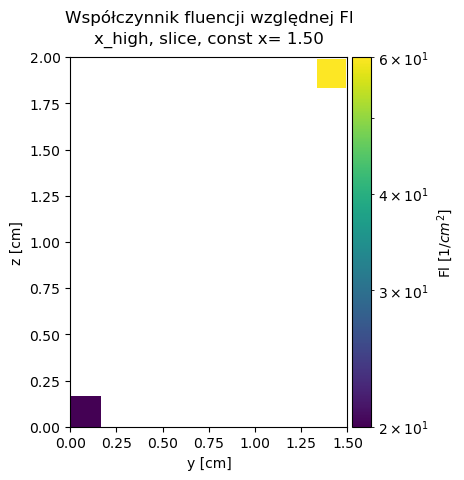

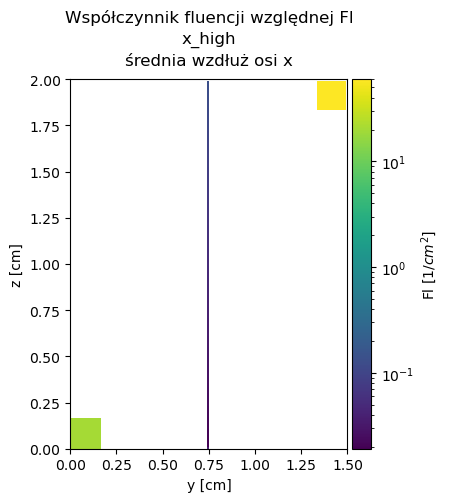

In [211]:
print("wykresy - org_1mld_cube")
temp_cub_list = [cube for cube in all_cubes if 'org_1mld_cube' in cube['name']]
print_all_frames(temp_cub_list)

### 2. x_high 2D - obraz średnie wzdłuż 1 osi (osi x) oraz przekroje (slices)

#### porównanie średnich

In [212]:
idx = 6 # średnia
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube          -0.01          -0.10           0.35           0.59            nan            nan
          mati_1_mln_cube           0.96           1.00          29.55            5.4            nan            nan
             my_1mln_cube           1.00           1.00          26.75            5.2            nan            nan
            my_10mln_cube           1.00           1.00           0.22           0.47            nan            nan
            org_1mld_cube           0.46           1.00           0.00           0.05            inf            0.0


In [213]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[ 1.         -0.00517607  0.96340742  0.99995504  0.99999596  0.4566158 ]
 [-0.00517607  1.         -0.00512083 -0.00509217 -0.00515903 -0.00748554]
 [ 0.96340742 -0.00512083  1.          0.96332491  0.96341151  0.47547516]
 [ 0.99995504 -0.00509217  0.96332491  1.          0.99995953  0.45649485]
 [ 0.99999596 -0.00515903  0.96341151  0.99995953  1.          0.45668066]
 [ 0.4566158  -0.00748554  0.47547516  0.45649485  0.45668066  1.        ]]

corrtable of histograms
[[ 1.         -0.09685075  0.99996118  0.99999994  0.99999998  0.99863342]
 [-0.09685075  1.         -0.0958381  -0.09686453 -0.09685971 -0.09022208]
 [ 0.99996118 -0.0958381   1.          0.9999588   0.99995977  0.99905356]
 [ 0.99999994 -0.09686453  0.9999588   1.          0.99999997  0.99862004]
 [ 0.99999998 -0.09685971  0.99995977  0.99999997  1.          0.99862532]
 [ 0.99863342 -0.09022208  0.99905356  0.99862004  0.99862532  1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 

#### Środkowy przekrój

In [214]:
idx = 1
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube           0.01          -0.06           0.58           0.76            inf            0.0
          mati_1_mln_cube           0.93           1.00       4,315.23        6.6e+01            nan            nan
             my_1mln_cube           1.00           1.00       1,687.76        4.1e+01            nan            nan
            my_10mln_cube           1.00           1.00          13.99            3.7            nan            nan
            org_1mld_cube              -          -0.01           0.17           0.41            nan            nan


In [215]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[1.         0.01002725 0.92699123 0.99941838 0.99994713        nan]
 [0.01002725 1.         0.00950047 0.01020594 0.01000864        nan]
 [0.92699123 0.00950047 1.         0.92566036 0.92714186        nan]
 [0.99941838 0.01020594 0.92566036 1.         0.9994919         nan]
 [0.99994713 0.01000864 0.92714186 0.9994919  1.                nan]
 [       nan        nan        nan        nan        nan        nan]]

corrtable of histograms
[[ 1.         -0.05979735  0.99989805  0.99999961  0.99999988 -0.01058988]
 [-0.05979735  1.         -0.05941311 -0.05974818 -0.05982676 -0.11816036]
 [ 0.99989805 -0.05941311  1.          0.99989339  0.99989602 -0.01030362]
 [ 0.99999961 -0.05974818  0.99989339  1.          0.99999974 -0.01056334]
 [ 0.99999988 -0.05982676  0.99989602  0.99999974  1.         -0.01061369]
 [-0.01058988 -0.11816036 -0.01030362 -0.01056334 -0.01061369  1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 'mati_1_mln_cube', 'my_1mln_cube', '

### 3. z_high 2D - obraz średnie wzdłuż 1 osi (osi z) oraz przekroje (slices)

#### Porównanie średnich

In [216]:
idx = 7
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube           0.01          -0.09           0.36            0.6            nan            nan
          mati_1_mln_cube           0.96           1.00         195.89        1.4e+01            nan            nan
             my_1mln_cube           1.00           1.00         129.77        1.1e+01            nan            nan
            my_10mln_cube           1.00           1.00           1.07            1.0            nan            nan
            org_1mld_cube           0.89           1.00           0.00          0.068            nan            nan


In [217]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[1.         0.00992654 0.96155381 0.99999365 0.99999943 0.8919636 ]
 [0.00992654 1.         0.01067381 0.00992996 0.00992428 0.00976779]
 [0.96155381 0.01067381 1.         0.96160337 0.96155416 0.96595073]
 [0.99999365 0.00992996 0.96160337 1.         0.99999408 0.89205822]
 [0.99999943 0.00992428 0.96155416 0.99999408 1.         0.89195641]
 [0.8919636  0.00976779 0.96595073 0.89205822 0.89195641 1.        ]]

corrtable of histograms
[[ 1.         -0.08989764  0.99999946  0.99999998  1.          0.99999682]
 [-0.08989764  1.         -0.08978094 -0.08989764 -0.08989764 -0.08959094]
 [ 0.99999946 -0.08978094  1.          0.99999947  0.99999946  0.99999886]
 [ 0.99999998 -0.08989764  0.99999947  1.          0.99999998  0.99999682]
 [ 1.         -0.08989764  0.99999946  0.99999998  1.          0.99999682]
 [ 0.99999682 -0.08959094  0.99999886  0.99999682  0.99999682  1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 'mati_1_mln_cube', 'my_1mln_cube', '

#### Środkowy przekrój

In [218]:
idx = 4
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube           0.01          -0.16           0.48           0.69            inf            0.0
          mati_1_mln_cube           0.49          -0.08           0.19           0.44            nan            nan
             my_1mln_cube           0.45          -0.07           0.30           0.55            nan            nan
            my_10mln_cube           0.86           0.93           0.00          0.044            inf            0.0
            org_1mld_cube           0.01          -0.15           0.00           0.04            nan            nan


In [219]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[ 1.00000000e+00  9.18424446e-03  4.86640674e-01  4.47777574e-01
   8.59584175e-01  1.39141777e-02]
 [ 9.18424446e-03  1.00000000e+00  2.64045658e-03  2.46743634e-03
   6.14030394e-03 -1.23150269e-04]
 [ 4.86640674e-01  2.64045658e-03  1.00000000e+00  2.19774989e-01
   4.18856511e-01 -2.34483506e-03]
 [ 4.47777574e-01  2.46743634e-03  2.19774989e-01  1.00000000e+00
   5.21720315e-01  8.01092995e-03]
 [ 8.59584175e-01  6.14030394e-03  4.18856511e-01  5.21720315e-01
   1.00000000e+00  1.49629092e-02]
 [ 1.39141777e-02 -1.23150269e-04 -2.34483506e-03  8.01092995e-03
   1.49629092e-02  1.00000000e+00]]

corrtable of histograms
[[ 1.         -0.16374303 -0.08412966 -0.07451384  0.92750366 -0.15170787]
 [-0.16374303  1.          0.07580362  0.08015298 -0.11681758  0.04067647]
 [-0.08412966  0.07580362  1.          0.69875482  0.04846351  0.81456141]
 [-0.07451384  0.08015298  0.69875482  1.          0.10348646  0.19015335]
 [ 0.92750366 -0.11681758  0.04846351  0

### 4. x_high 1D - Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi z

f"średnia wzdłuż osi x oraz y", idx=16 - Zmiana współczynnik fluencji względnej wzdłuż osi z\
f"średnia wzdłuż osi x oraz z", idx=17 - Zmiana współczynnik fluencji względnej wzdłuż osi y\
f"średnia wzdłuż osi y oraz z", idx=18 - Zmiana współczynnik fluencji względnej wzdłuż osi x\
"",

[1.9916666666666667, 1.9833333333333334, 1.975, 1.9666666666666666, 1.9583333333333333, 1.95, 1.9416666666666667, 1.9333333333333333, 1.925, 1.9166666666666667, 1.9083333333333334, 1.9, 1.8916666666666666, 1.8833333333333333, 1.875, 1.8666666666666667, 1.8583333333333334, 1.85, 1.8416666666666666, 1.8333333333333333, 1.825, 1.8166666666666667, 1.8083333333333333, 1.8, 1.7916666666666667, 1.7833333333333334, 1.775, 1.7666666666666666, 1.7583333333333333, 1.75, 1.7416666666666667, 1.7333333333333334, 1.725, 1.7166666666666666, 1.7083333333333333, 1.7, 1.6916666666666667, 1.6833333333333333, 1.675, 1.6666666666666667, 1.6583333333333334, 1.65, 1.6416666666666666, 1.6333333333333333, 1.625, 1.6166666666666667, 1.6083333333333334, 1.6, 1.5916666666666666, 1.5833333333333333, 1.575, 1.5666666666666667, 1.5583333333333333, 1.55, 1.5416666666666667, 1.5333333333333334, 1.525, 1.5166666666666666, 1.5083333333333333, 1.5, 1.4916666666666667, 1.4833333333333334, 1.475, 1.4666666666666666, 1.45833

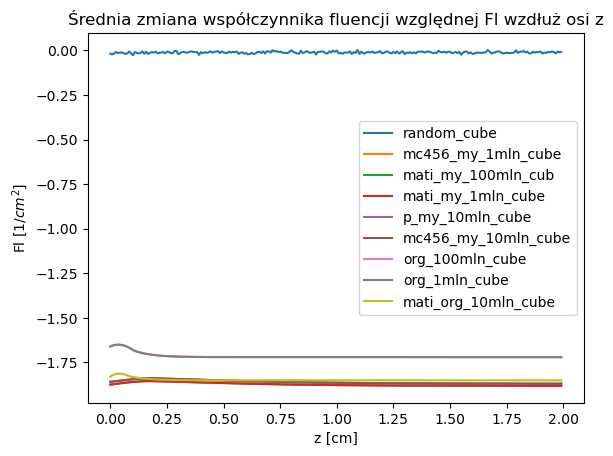

240


In [140]:
idx = 16
samples = all_cubes[0]['frames'][idx]
x_tics = [ val / bins_per_cm for val in range(len(samples)-1, -1, -1) ]
print(x_tics)
fig, ax = plt.subplots()
for c in all_cubes[0:1] + all_cubes[2:-1]:
    samples = c['frames'][idx]
    ax.plot(x_tics, samples, label=c['name'])
    ax.legend()
plt.title("Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi z")
plt.xlabel("z [cm]")
plt.ylabel(r"Fl [$1/cm^2$]")
plt.yscale('log')
plt.show()

print(len(samples))

In [221]:
idx = 16
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube           0.07          -0.28           0.34           0.59            inf            0.0
          mati_1_mln_cube           1.00           0.97           3.12            1.8            nan            nan
             my_1mln_cube           1.00           0.99           3.87            2.0            nan            nan
            my_10mln_cube           1.00           1.00           0.03           0.18            nan            nan
            org_1mld_cube           0.98          -0.25           0.00           0.02            inf            0.0


In [222]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[1.         0.07303289 0.99918611 0.99999633 0.99999962 0.97801637]
 [0.07303289 1.         0.06560752 0.0731649  0.07302476 0.10947197]
 [0.99918611 0.06560752 1.         0.99916157 0.99918171 0.9696173 ]
 [0.99999633 0.0731649  0.99916157 1.         0.99999687 0.97815939]
 [0.99999962 0.07302476 0.99918171 0.99999687 1.         0.97804103]
 [0.97801637 0.10947197 0.9696173  0.97815939 0.97804103 1.        ]]

corrtable of histograms
[[ 1.         -0.28023843  0.9730455   0.98940038  0.99788807 -0.247023  ]
 [-0.28023843  1.         -0.26739229 -0.27831672 -0.28083153  0.2215192 ]
 [ 0.9730455  -0.26739229  1.          0.96961317  0.97703959 -0.24719925]
 [ 0.98940038 -0.27831672  0.96961317  1.          0.9893644  -0.25065788]
 [ 0.99788807 -0.28083153  0.97703959  0.9893644   1.         -0.2475458 ]
 [-0.247023    0.2215192  -0.24719925 -0.25065788 -0.2475458   1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 'mati_1_mln_cube', 'my_1mln_cube', '

### 4.5. x_high 1D - Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi y

[1.4916666666666667, 1.4833333333333334, 1.475, 1.4666666666666666, 1.4583333333333333, 1.45, 1.4416666666666667, 1.4333333333333333, 1.425, 1.4166666666666667, 1.4083333333333334, 1.4, 1.3916666666666666, 1.3833333333333333, 1.375, 1.3666666666666667, 1.3583333333333334, 1.35, 1.3416666666666666, 1.3333333333333333, 1.325, 1.3166666666666667, 1.3083333333333333, 1.3, 1.2916666666666667, 1.2833333333333334, 1.275, 1.2666666666666666, 1.2583333333333333, 1.25, 1.2416666666666667, 1.2333333333333334, 1.225, 1.2166666666666666, 1.2083333333333333, 1.2, 1.1916666666666667, 1.1833333333333333, 1.175, 1.1666666666666667, 1.1583333333333334, 1.15, 1.1416666666666666, 1.1333333333333333, 1.125, 1.1166666666666667, 1.1083333333333334, 1.1, 1.0916666666666666, 1.0833333333333333, 1.075, 1.0666666666666667, 1.0583333333333333, 1.05, 1.0416666666666667, 1.0333333333333334, 1.025, 1.0166666666666666, 1.0083333333333333, 1.0, 0.9916666666666667, 0.9833333333333333, 0.975, 0.9666666666666667, 0.95833

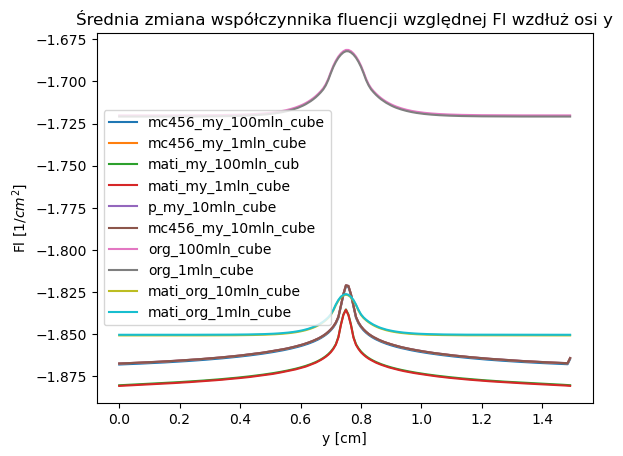

180


In [139]:
idx = 17
samples = all_cubes[0]['frames'][idx]
x_tics = [ val / bins_per_cm for val in range(len(samples)-1, -1, -1) ]
print(x_tics)
fig, ax = plt.subplots()
for c in all_cubes[1:]:
    samples = c['frames'][idx]
    ax.plot(x_tics, samples, label=c['name'])
    ax.legend()
plt.title("Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi y")
plt.xlabel("y [cm]")
plt.ylabel(r"Fl [$1/cm^2$]")
plt.yscale('log')
plt.show()

print(len(samples))

In [263]:
idx = 17
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube          -0.12          -0.26           0.34           0.59            nan            nan
          mati_1_mln_cube           0.98           0.99           4.58            2.1            nan            nan
             my_1mln_cube           1.00           1.00           4.80            2.2            nan            nan
            my_10mln_cube           1.00           1.00           0.04            0.2            nan            nan
            org_1mld_cube           0.72           0.64           0.00           0.02            nan            nan


In [264]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[ 1.         -0.12164001  0.98303663  0.99999766  0.99999977  0.72338931]
 [-0.12164001  1.         -0.14758538 -0.12165132 -0.12159963 -0.16129459]
 [ 0.98303663 -0.14758538  1.          0.98310811  0.98302863  0.79749836]
 [ 0.99999766 -0.12165132  0.98310811  1.          0.99999785  0.72352782]
 [ 0.99999977 -0.12159963  0.98302863  0.99999785  1.          0.7234351 ]
 [ 0.72338931 -0.16129459  0.79749836  0.72352782  0.7234351   1.        ]]

corrtable of histograms
[[ 1.         -0.26061291  0.98897763  0.99935345  1.          0.64115839]
 [-0.26061291  1.         -0.25253814 -0.26296761 -0.26061291 -0.04291895]
 [ 0.98897763 -0.25253814  1.          0.99139992  0.98897763  0.60773738]
 [ 0.99935345 -0.26296761  0.99139992  1.          0.99935345  0.62624172]
 [ 1.         -0.26061291  0.98897763  0.99935345  1.          0.64115839]
 [ 0.64115839 -0.04291895  0.60773738  0.62624172  0.64115839  1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 

### 5. x_high 1D - Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi x

[1.4916666666666667, 1.4833333333333334, 1.475, 1.4666666666666666, 1.4583333333333333, 1.45, 1.4416666666666667, 1.4333333333333333, 1.425, 1.4166666666666667, 1.4083333333333334, 1.4, 1.3916666666666666, 1.3833333333333333, 1.375, 1.3666666666666667, 1.3583333333333334, 1.35, 1.3416666666666666, 1.3333333333333333, 1.325, 1.3166666666666667, 1.3083333333333333, 1.3, 1.2916666666666667, 1.2833333333333334, 1.275, 1.2666666666666666, 1.2583333333333333, 1.25, 1.2416666666666667, 1.2333333333333334, 1.225, 1.2166666666666666, 1.2083333333333333, 1.2, 1.1916666666666667, 1.1833333333333333, 1.175, 1.1666666666666667, 1.1583333333333334, 1.15, 1.1416666666666666, 1.1333333333333333, 1.125, 1.1166666666666667, 1.1083333333333334, 1.1, 1.0916666666666666, 1.0833333333333333, 1.075, 1.0666666666666667, 1.0583333333333333, 1.05, 1.0416666666666667, 1.0333333333333334, 1.025, 1.0166666666666666, 1.0083333333333333, 1.0, 0.9916666666666667, 0.9833333333333333, 0.975, 0.9666666666666667, 0.95833

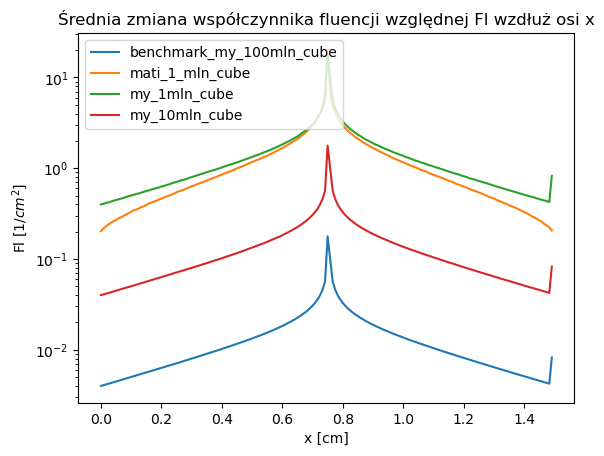

180


In [265]:
idx = 18
samples = all_cubes[0]['frames'][idx]
x_tics = [ val / bins_per_cm for val in range(len(samples)-1, -1, -1) ]
print(x_tics)
fig, ax = plt.subplots()
for c in all_cubes[0:1] + all_cubes[2:-1]:
    samples = c['frames'][idx]
    ax.plot(x_tics, samples, label=c['name'])
    ax.legend()
plt.title("Średnia zmiana współczynnika fluencji względnej Fl wzdłuż osi x")
plt.xlabel("x [cm]")
plt.ylabel(r"Fl [$1/cm^2$]")
plt.yscale('log')
plt.show()

print(len(samples))

In [266]:
idx = 18
benchmark_cube = all_cubes[0]
benchmark_arrs = all_cubes[0]['frames'][idx]
other_frame_arrs = [c['frames'][idx] for c in all_cubes]
compare_all_cubes_universal(all_cubes, benchmark_cube, other_arr_list=other_frame_arrs, benchmark_arr=benchmark_arrs)

Comparison * to benchmark (benchmark_my_100mln_cube)
                     name      flat corr flat hist corr            MSE           RMSE      chi2_stat   chi2 p_value
 benchmark_my_100mln_cube           1.00           1.00           0.00            0.0            nan            nan
              random_cube          -0.08          -0.14           0.34           0.59            nan            nan
          mati_1_mln_cube           0.98           0.99           4.58            2.1            nan            nan
             my_1mln_cube           1.00           1.00           4.80            2.2            nan            nan
            my_10mln_cube           1.00           1.00           0.04            0.2            nan            nan
            org_1mld_cube           0.72           0.64           0.00           0.02            nan            nan


In [267]:
corr_table_universal(all_cubes, other_frame_arrs)


corrtable of flatten cubes
[[ 1.         -0.07990985  0.98281113  0.99999778  0.9999998   0.72339345]
 [-0.07990985  1.         -0.09116441 -0.08013266 -0.07995421 -0.11626566]
 [ 0.98281113 -0.09116441  1.          0.98275342  0.98285032  0.79773152]
 [ 0.99999778 -0.08013266  0.98275342  1.          0.99999771  0.72345364]
 [ 0.9999998  -0.07995421  0.98285032  0.99999771  1.          0.72355661]
 [ 0.72339345 -0.11626566  0.79773152  0.72345364  0.72355661  1.        ]]

corrtable of histograms
[[ 1.         -0.13910324  0.98890029  0.99868703  1.          0.64115839]
 [-0.13910324  1.         -0.13024819 -0.13770165 -0.13910324 -0.04136928]
 [ 0.98890029 -0.13024819  1.          0.98903719  0.98890029  0.60845617]
 [ 0.99868703 -0.13770165  0.98903719  1.          0.99868703  0.64327513]
 [ 1.         -0.13910324  0.98890029  0.99868703  1.          0.64115839]
 [ 0.64115839 -0.04136928  0.60845617  0.64327513  0.64115839  1.        ]]

['benchmark_my_100mln_cube', 'random_cube', 

## Czasy symulacji

In [223]:
all_names = []
all_photons = []
all_seconds = []

# własna symulacja
name = "własna implementacja"
photons = [1_000_000]
seconds = [1784]

# własna symulacja
name = "własna implementacja"
photons = [1_000_000]
seconds = [1784]




SyntaxError: invalid syntax (1699236237.py, line 1)

## Wykresy 3D

wykresy 3D - vispy_chart3d.py